# Project Title: Laptop Price Prediction for SmartTech Co.

## Project Overview:
### SmartTech Co. has partnered with our data science team to develop a robust machine learning model that predicts laptop prices accurately. As the market for laptops continues to expand with a myriad of brands and specifications, having a precise pricing model becomes crucial for both consumers and manufacturers.

# To load the file

In [1]:
# Uploading the required file
from google.colab import files
uploaded=files.upload()

Saving laptop.csv to laptop.csv


In [145]:
# importing libraries to do EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')
# Load the dataset into a pandas DataFrame
df_laptop=pd.read_csv('laptop.csv')
df_laptop.head() # To view 5 rows of data.

,Unnamed: 0.1,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,0.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,1.0,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,2.0,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,3.0,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,4.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


# Data cleaning
## Removed the unnecessary columns.

In [146]:
# removed the unnamed feature
df_laptop.drop(columns=['Unnamed: 0','Unnamed: 0.1'],axis=1,inplace=True)
df_laptop.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [147]:
# to view rows and columns
df_laptop.shape

(1303, 11)

In [148]:
# Basic information of each feature in data set
df_laptop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1273 non-null   object 
 1   TypeName          1273 non-null   object 
 2   Inches            1273 non-null   object 
 3   ScreenResolution  1273 non-null   object 
 4   Cpu               1273 non-null   object 
 5   Ram               1273 non-null   object 
 6   Memory            1273 non-null   object 
 7   Gpu               1273 non-null   object 
 8   OpSys             1273 non-null   object 
 9   Weight            1273 non-null   object 
 10  Price             1273 non-null   float64
dtypes: float64(1), object(10)
memory usage: 112.1+ KB


In [149]:
df_laptop.isnull().sum().all()

True

In [150]:
# remove the blank rows
df_laptop.dropna(inplace=True)
df_laptop.shape

(1273, 11)

# checking wrong values and replacing them using multivariate imputation.
# checking data type and coverting appropriate type.

In [151]:
df_laptop['Inches'].value_counts()

,count
Inches,
15.6,640
14,192
17.3,162
13.3,161
12.5,38
11.6,31
12,6
13.9,6
13.5,5


In [152]:
# Observe the row with ? in Inches
df_laptop[df_laptop['Inches']=='?']

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
476,Dell,Workstation,?,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8GB,256GB SSD,Nvidia Quadro M1200,Windows 10,1.78kg,128298.24


In [153]:
# observe the laptops of dell company and workstation type
df_laptop[(df_laptop['Company']=='Dell') & (df_laptop['TypeName']=='Workstation')]


,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
204,Dell,Workstation,15.6,4K Ultra HD 3840x2160,Intel Xeon E3-1505M V6 3GHz,16GB,256GB SSD + 1TB HDD,Nvidia Quadro M1200,Windows 10,2.8kg,162770.4000
297,Dell,Workstation,17.3,Full HD 1920x1080,Intel Core i7 7820HQ 2.9GHz,16GB,256GB SSD,Nvidia Quadro M1200,Windows 10,3.42kg,153705.3408
387,Dell,Workstation,15.6,Full HD 1920x1080,Intel Core i5 6440HQ 2.6GHz,8GB,500GB HDD,AMD FirePro W5130M,Windows 10,2.23kg,72940.3200
388,Dell,Workstation,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 6820HQ 2.7GHz,8GB,256GB SSD,Nvidia Quadro M1200,Windows 10,2kg,113752.8000
398,Dell,Workstation,15.6,4K Ultra HD / Touchscreen 3840x2160,Intel Core i7 7700HQ 2.8GHz,8GB,256GB SSD,Nvidia Quadro M1200,Windows 10,1.78kg,144495.3600
447,Dell,Workstation,15.6,Full HD 1920x1080,Intel Xeon E3-1505M V6 3GHz,8GB,64GB Flash Storage + 1TB HDD,Nvidia Quadro M620,Windows 10,2.23kg,106187.0400
451,Dell,Workstation,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 6820HQ 2.7GHz,16GB,256GB SSD,Nvidia Quadro M620,Windows 10,2.17kg,105228.0000
476,Dell,Workstation,?,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8GB,256GB SSD,Nvidia Quadro M1200,Windows 10,1.78kg,128298.2400
486,Dell,Workstation,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 6820HQ 2.7GHz,16GB,512GB SSD,Nvidia Quadro M620,Windows 10,2.17kg,124568.6400
599,Dell,Workstation,15.6,Full HD / Touchscreen 1920x1080,Intel Core i7 7700HQ 2.8GHz,8GB,256GB SSD,Nvidia Quadro M620,Windows 10,2.06kg,93932.6400


In [154]:
# by observing the above tabel we can replace Inches feature with value ? to 15.6
df_laptop['Inches'].replace('?',15.6,inplace=True)
df_laptop['Inches'].value_counts()

,count
Inches,
15.6,640
14,192
17.3,162
13.3,161
12.5,38
11.6,31
12,6
13.9,6
13.5,5


In [155]:
# now change the type of Inches feature to float
df_laptop['Inches']=df_laptop['Inches'].astype(float)
df_laptop.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1273 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1273 non-null   object 
 1   TypeName          1273 non-null   object 
 2   Inches            1273 non-null   float64
 3   ScreenResolution  1273 non-null   object 
 4   Cpu               1273 non-null   object 
 5   Ram               1273 non-null   object 
 6   Memory            1273 non-null   object 
 7   Gpu               1273 non-null   object 
 8   OpSys             1273 non-null   object 
 9   Weight            1273 non-null   object 
 10  Price             1273 non-null   float64
dtypes: float64(2), object(9)
memory usage: 119.3+ KB


In [156]:
# check count of Company feature
print(df_laptop['Company'].value_counts())
print("\nDistict count of Laptop Companies",df_laptop['Company'].nunique())

Company
Lenovo       290
Dell         287
HP           266
Asus         156
Acer         103
MSI           53
Toshiba       47
Apple         21
Samsung        9
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
LG             3
Huawei         2
Fujitsu        2
Name: count, dtype: int64

Distict count of Laptop Companies 19


In [157]:
print(df_laptop['TypeName'].value_counts())
print("\nDistict count of Laptop Types",df_laptop['TypeName'].nunique())

TypeName
Notebook              710
Gaming                203
Ultrabook             191
2 in 1 Convertible    116
Workstation            29
Netbook                24
Name: count, dtype: int64

Distict count of Laptop Types 6


In [158]:
# change the type Netbook to notebook
df_laptop['TypeName'].replace('Netbook','Notebook',inplace=True)
df_laptop['TypeName'].value_counts()

,count
TypeName,
Notebook,734
Gaming,203
Ultrabook,191
2 in 1 Convertible,116
Workstation,29


In [159]:
df_laptop['ScreenResolution'].value_counts()

,count
ScreenResolution,
Full HD 1920x1080,495
1366x768,274
IPS Panel Full HD 1920x1080,226
IPS Panel Full HD / Touchscreen 1920x1080,52
Full HD / Touchscreen 1920x1080,45
1600x900,23
Touchscreen 1366x768,16
Quad HD+ / Touchscreen 3200x1800,14
IPS Panel 4K Ultra HD 3840x2160,12


In [160]:
df_laptop['Cpu'].value_counts()

,count
Cpu,
Intel Core i5 7200U 2.5GHz,183
Intel Core i7 7700HQ 2.8GHz,142
Intel Core i7 7500U 2.7GHz,128
Intel Core i7 8550U 1.8GHz,72
Intel Core i5 8250U 1.6GHz,68
...,...
AMD A9-Series 9420 2.9GHz,1
Intel Core i7 2.2GHz,1
AMD A6-Series 7310 2GHz,1


In [161]:
df_laptop['Ram'].value_counts()

,count
Ram,
8GB,601
4GB,367
16GB,194
6GB,40
12GB,25
2GB,22
32GB,17
64GB,3
24GB,3


In [162]:
# remove "GB" from RAM
df_laptop["Ram"]=df_laptop["Ram"].str.replace("GB","")
# converting from string---->integer for Ram column
df_laptop['Ram'] = df_laptop['Ram'].astype('int')
df_laptop.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1273 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1273 non-null   object 
 1   TypeName          1273 non-null   object 
 2   Inches            1273 non-null   float64
 3   ScreenResolution  1273 non-null   object 
 4   Cpu               1273 non-null   object 
 5   Ram               1273 non-null   int64  
 6   Memory            1273 non-null   object 
 7   Gpu               1273 non-null   object 
 8   OpSys             1273 non-null   object 
 9   Weight            1273 non-null   object 
 10  Price             1273 non-null   float64
dtypes: float64(2), int64(1), object(8)
memory usage: 119.3+ KB


In [163]:
df_laptop['Memory'].value_counts()

,count
Memory,
256GB SSD,401
1TB HDD,217
500GB HDD,130
512GB SSD,116
128GB SSD + 1TB HDD,92
128GB SSD,74
256GB SSD + 1TB HDD,71
32GB Flash Storage,37
2TB HDD,16


In [164]:
# In memory column one value is ?
df_laptop[df_laptop['Memory']=='?']

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
770,Dell,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,16,?,AMD Radeon R7 M445,Windows 10,2.3kg,62938.0656


In [165]:
# to replace check the data with company dell and typename Notebook
df_laptop[(df_laptop['Company']=='Dell') & (df_laptop['TypeName']=='Notebook') & (df_laptop['Ram']=='16GB')]

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price


In [166]:
# replace the memory value ? with 256GB SSD + 2TB HDD as its price is high than all
df_laptop['Memory'].replace('?',"256GB SSD + 2TB HDD",inplace=True)
df_laptop['Memory'].value_counts()

,count
Memory,
256GB SSD,401
1TB HDD,217
500GB HDD,130
512GB SSD,116
128GB SSD + 1TB HDD,92
128GB SSD,74
256GB SSD + 1TB HDD,71
32GB Flash Storage,37
2TB HDD,16


In [167]:
df_laptop['Gpu'].value_counts()

,count
Gpu,
Intel HD Graphics 620,271
Intel HD Graphics 520,181
Intel UHD Graphics 620,66
Nvidia GeForce GTX 1050,64
Nvidia GeForce GTX 1060,48
...,...
AMD Radeon R5 520,1
AMD Radeon R7,1
Intel HD Graphics 540,1


In [168]:
df_laptop['OpSys'].value_counts()


,count
OpSys,
Windows 10,1047
No OS,63
Linux,61
Windows 7,45
Chrome OS,27
macOS,13
Mac OS X,8
Windows 10 S,8
Android,1


In [169]:
# replace s in windows 10 S to ""
df_laptop['OpSys']=df_laptop['OpSys'].str.replace('Windows 10 S','Windows 10')
df_laptop['OpSys'].value_counts()

,count
OpSys,
Windows 10,1055
No OS,63
Linux,61
Windows 7,45
Chrome OS,27
macOS,13
Mac OS X,8
Android,1


In [170]:
df_laptop['Weight'].value_counts()

,count
Weight,
2.2kg,111
2.1kg,57
2.4kg,43
2.3kg,41
2.5kg,37
...,...
1.41kg,1
3.6kg,1
4.7kg,1


In [171]:
df_laptop[df_laptop['Weight']=='?']

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
208,Dell,Ultrabook,13.3,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,8,256GB SSD,Intel UHD Graphics 620,Windows 10,?,77202.72


In [172]:
df_laptop[(df_laptop['Company']=='Dell') & (df_laptop['TypeName']=='Ultrabook') & (df_laptop['Inches']==13.3) & (df_laptop['ScreenResolution']=='Full HD 1920x1080') & (df_laptop['Memory']=='256GB SSD') & (df_laptop['Gpu']=='Intel UHD Graphics 620')]

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
181,Dell,Ultrabook,13.3,Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8,256GB SSD,Intel UHD Graphics 620,Windows 10,1.23kg,74538.720
208,Dell,Ultrabook,13.3,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,8,256GB SSD,Intel UHD Graphics 620,Windows 10,?,77202.720
255,Dell,Ultrabook,13.3,Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8,256GB SSD,Intel UHD Graphics 620,Windows 10,1.41kg,50562.720
344,Dell,Ultrabook,13.3,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,8,256GB SSD,Intel UHD Graphics 620,Windows 10,1.2kg,84129.120
652,Dell,Ultrabook,13.3,Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8,256GB SSD,Intel UHD Graphics 620,Windows 10,1.2kg,77250.672


In [173]:
# replace value of weight ? into 1.23
df_laptop['Weight'].replace('?','1.23kg',inplace=True)
df_laptop['Weight'].value_counts()

,count
Weight,
2.2kg,111
2.1kg,57
2.4kg,43
2.3kg,41
2.5kg,37
...,...
1.39kg,1
11.1kg,1
1.14kg,1


In [174]:
# remove kg from weight column and convert to float
df_laptop['Weight']=df_laptop['Weight'].str.replace('kg','')
df_laptop['Weight']=df_laptop['Weight'].astype(float)
df_laptop.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1273 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1273 non-null   object 
 1   TypeName          1273 non-null   object 
 2   Inches            1273 non-null   float64
 3   ScreenResolution  1273 non-null   object 
 4   Cpu               1273 non-null   object 
 5   Ram               1273 non-null   int64  
 6   Memory            1273 non-null   object 
 7   Gpu               1273 non-null   object 
 8   OpSys             1273 non-null   object 
 9   Weight            1273 non-null   float64
 10  Price             1273 non-null   float64
dtypes: float64(3), int64(1), object(7)
memory usage: 119.3+ KB


In [175]:
df_laptop.isnull().sum()

,0
Company,0
TypeName,0
Inches,0
ScreenResolution,0
Cpu,0
Ram,0
Memory,0
Gpu,0
OpSys,0
Weight,0


# check the duplicates and remove.

In [176]:
df_laptop.duplicated().sum()

29

In [177]:
# remove the duplicates
df_laptop.drop_duplicates(inplace=True)
df_laptop.duplicated().sum()

0

# Outliers handling

<Axes: >

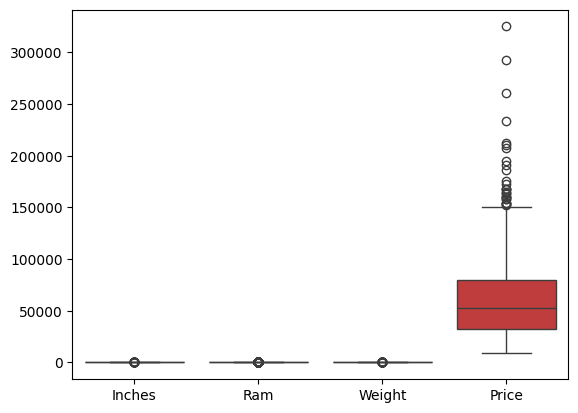

In [178]:
# check the outliers
sns.boxplot(df_laptop)

<Axes: ylabel='Inches'>

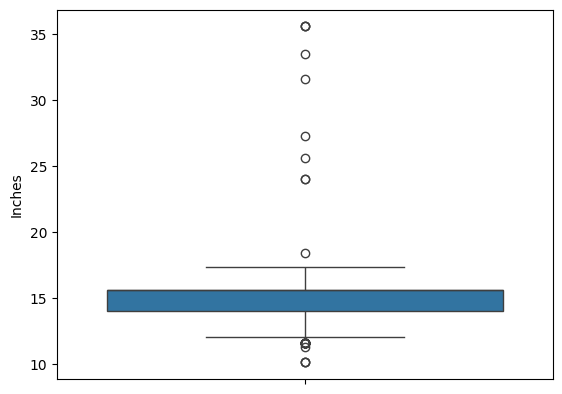

In [179]:
sns.boxplot(df_laptop['Inches'])

<Axes: ylabel='Inches'>

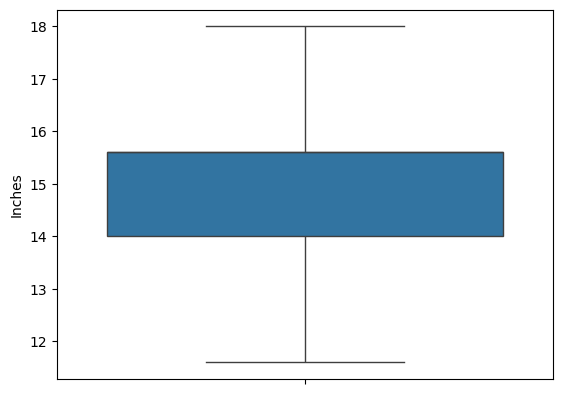

In [180]:
# replace the outliers
Q1=df_laptop['Inches'].quantile(0.25)
Q3=df_laptop['Inches'].quantile(0.75)
IQR=Q3-Q1
lower_bound=Q1-(1.5*IQR)
upper_bound=Q3+(1.5*IQR)
df_laptop['Inches']=np.where(df_laptop['Inches']<lower_bound,lower_bound,df_laptop['Inches'])
df_laptop['Inches']=np.where(df_laptop['Inches']>upper_bound,upper_bound,df_laptop['Inches'])
sns.boxplot(df_laptop['Inches'])

<Axes: ylabel='Ram'>

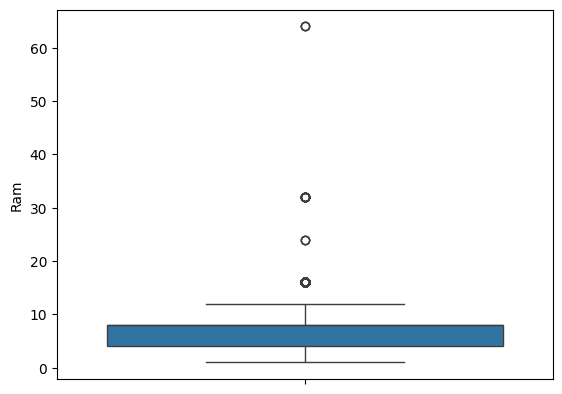

In [181]:
sns.boxplot(df_laptop['Ram'])

<Axes: ylabel='Ram'>

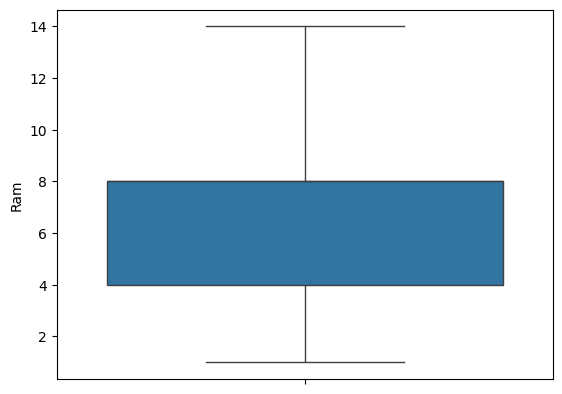

In [182]:
Q1=df_laptop['Ram'].quantile(0.25)
Q3=df_laptop['Ram'].quantile(0.75)
IQR=Q3-Q1
upper_bound=Q3+(1.5*IQR)
df_laptop['Ram']=np.where(df_laptop['Ram']>upper_bound,upper_bound,df_laptop['Ram'])
sns.boxplot(df_laptop['Ram'])

<Axes: ylabel='Weight'>

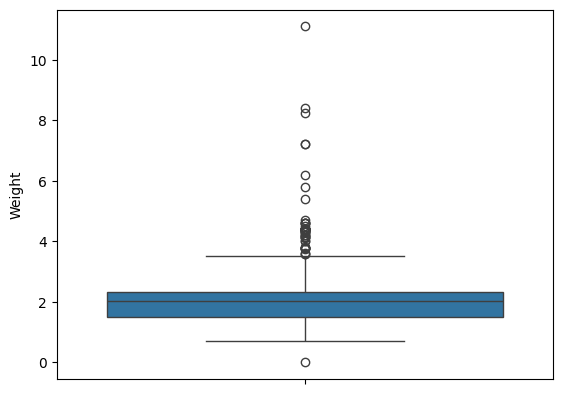

In [183]:
sns.boxplot(df_laptop['Weight'])

<Axes: ylabel='Weight'>

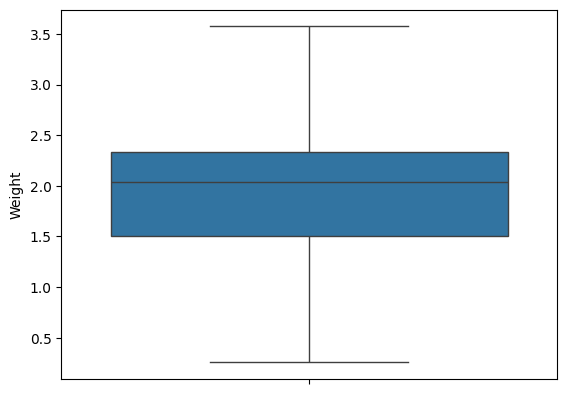

In [184]:
# outliers replacement
Q1=df_laptop['Weight'].quantile(0.25)
Q3=df_laptop['Weight'].quantile(0.75)
IQR=Q3-Q1
lower_bound=Q1-(1.5*IQR)
upper_bound=Q3+(1.5*IQR)
df_laptop['Weight']=np.where(df_laptop['Weight']<lower_bound,lower_bound,df_laptop['Weight'])
df_laptop['Weight']=np.where(df_laptop['Weight']>upper_bound,upper_bound,df_laptop['Weight'])
sns.boxplot(df_laptop['Weight'])


<Axes: ylabel='Price'>

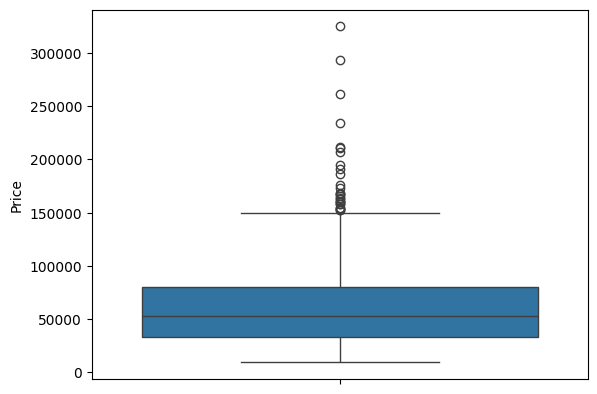

In [185]:
sns.boxplot(df_laptop['Price'])

<Axes: ylabel='Price'>

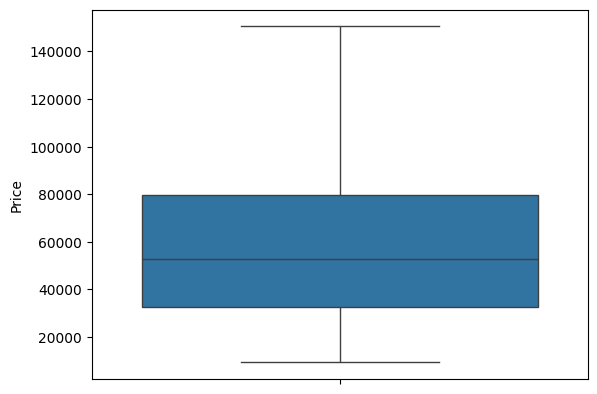

In [186]:
#outliers handling in Price
Q1=df_laptop['Price'].quantile(0.25)
Q3=df_laptop['Price'].quantile(0.75)
IQR=Q3-Q1
upper_bound=Q3+(1.5*IQR)
df_laptop['Price']=np.where(df_laptop['Price']>upper_bound,upper_bound,df_laptop['Price'])
sns.boxplot(df_laptop['Price'])

In [187]:
df_laptop.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1244 entries, 0 to 1273
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1244 non-null   object 
 1   TypeName          1244 non-null   object 
 2   Inches            1244 non-null   float64
 3   ScreenResolution  1244 non-null   object 
 4   Cpu               1244 non-null   object 
 5   Ram               1244 non-null   float64
 6   Memory            1244 non-null   object 
 7   Gpu               1244 non-null   object 
 8   OpSys             1244 non-null   object 
 9   Weight            1244 non-null   float64
 10  Price             1244 non-null   float64
dtypes: float64(4), object(7)
memory usage: 116.6+ KB


In [188]:
# change the type of ram column to int
df_laptop['Ram']=df_laptop['Ram'].astype(int)
df_laptop.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1244 entries, 0 to 1273
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1244 non-null   object 
 1   TypeName          1244 non-null   object 
 2   Inches            1244 non-null   float64
 3   ScreenResolution  1244 non-null   object 
 4   Cpu               1244 non-null   object 
 5   Ram               1244 non-null   int64  
 6   Memory            1244 non-null   object 
 7   Gpu               1244 non-null   object 
 8   OpSys             1244 non-null   object 
 9   Weight            1244 non-null   float64
 10  Price             1244 non-null   float64
dtypes: float64(3), int64(1), object(7)
memory usage: 116.6+ KB


# (EDA) Data Exploration and Understanding:

<Axes: xlabel='count', ylabel='OpSys'>

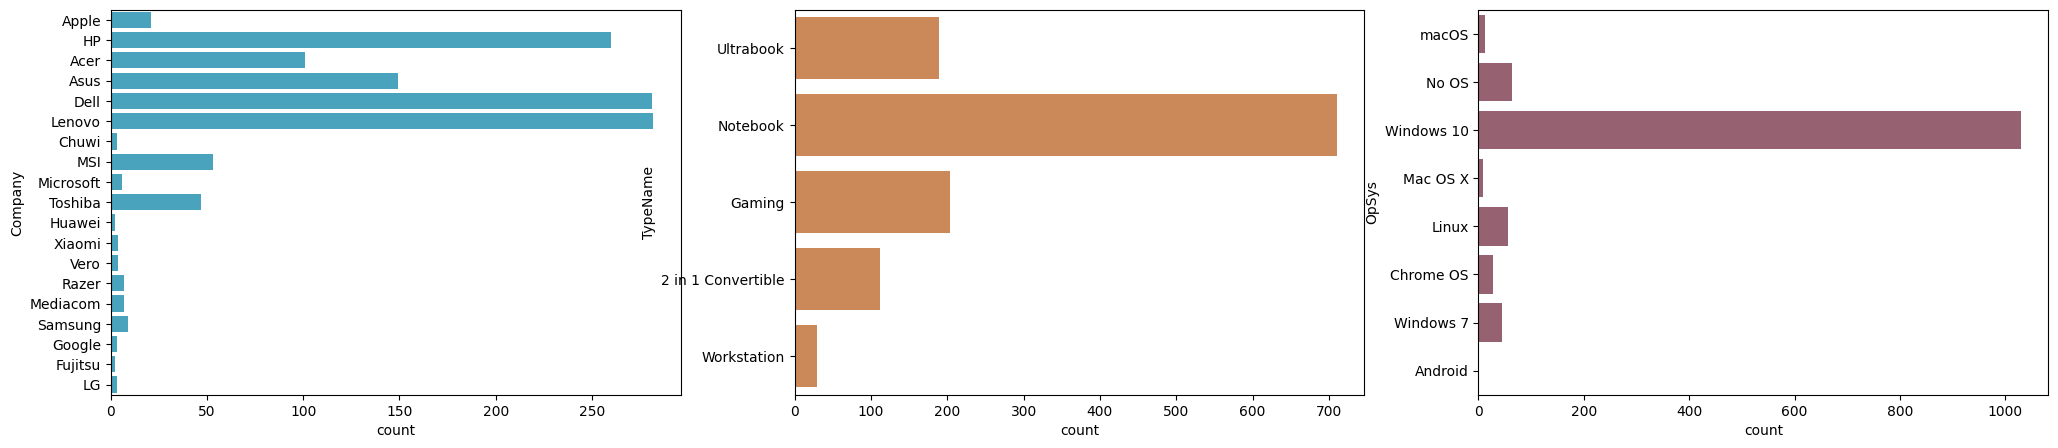

In [189]:
# Count plot for company, typename, Opsys
plt.figure(figsize=(25,5))
plt.subplot(1,3,1)
sns.countplot(df_laptop['Company'],color='#37aed0')
plt.subplot(1,3,2)
sns.countplot(df_laptop['TypeName'],color='#de8446')
plt.subplot(1,3,3)
sns.countplot(df_laptop['OpSys'],color='#9f596d')

## Price variation by company, type, opsys, inches, weight, Ram

<Axes: xlabel='Company', ylabel='Price'>

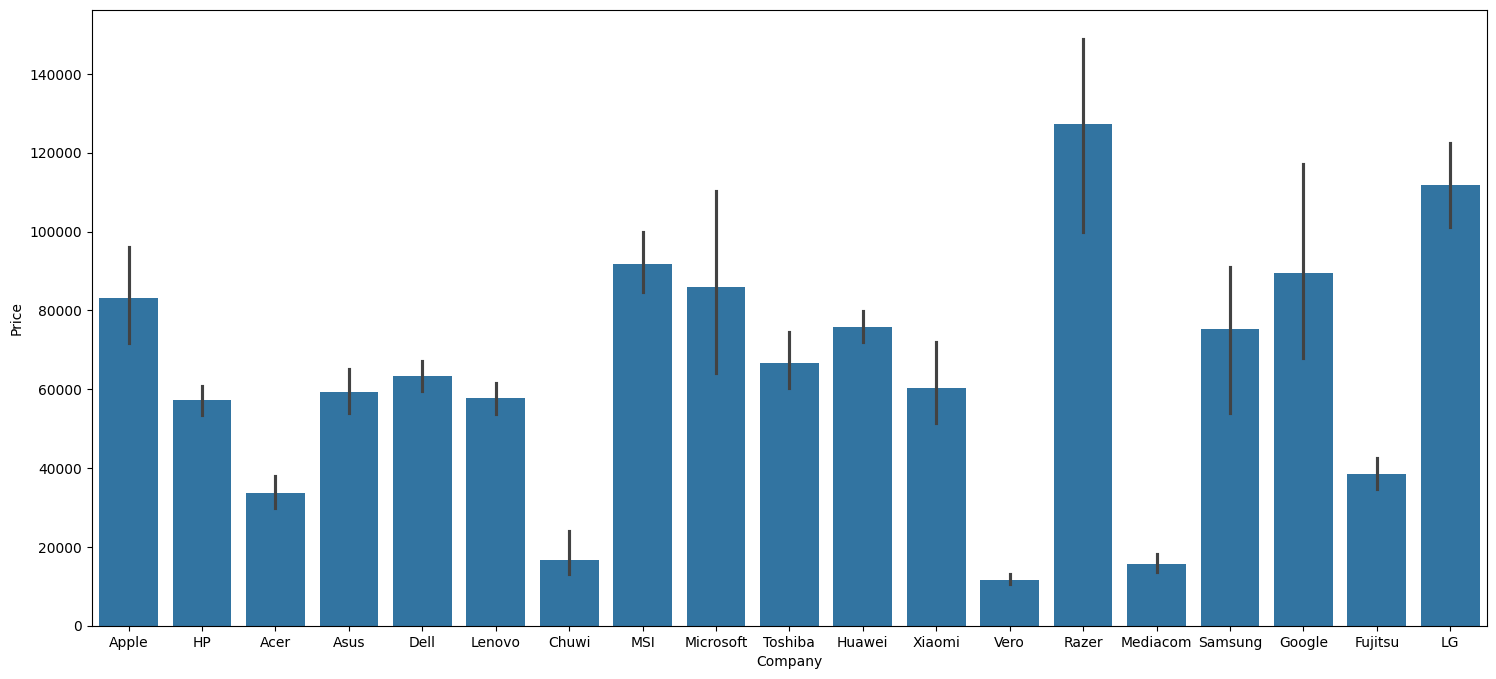

In [190]:
plt.figure(figsize=(18,8))
sns.barplot(x='Company',y='Price',data=df_laptop)

<Axes: xlabel='OpSys', ylabel='Price'>

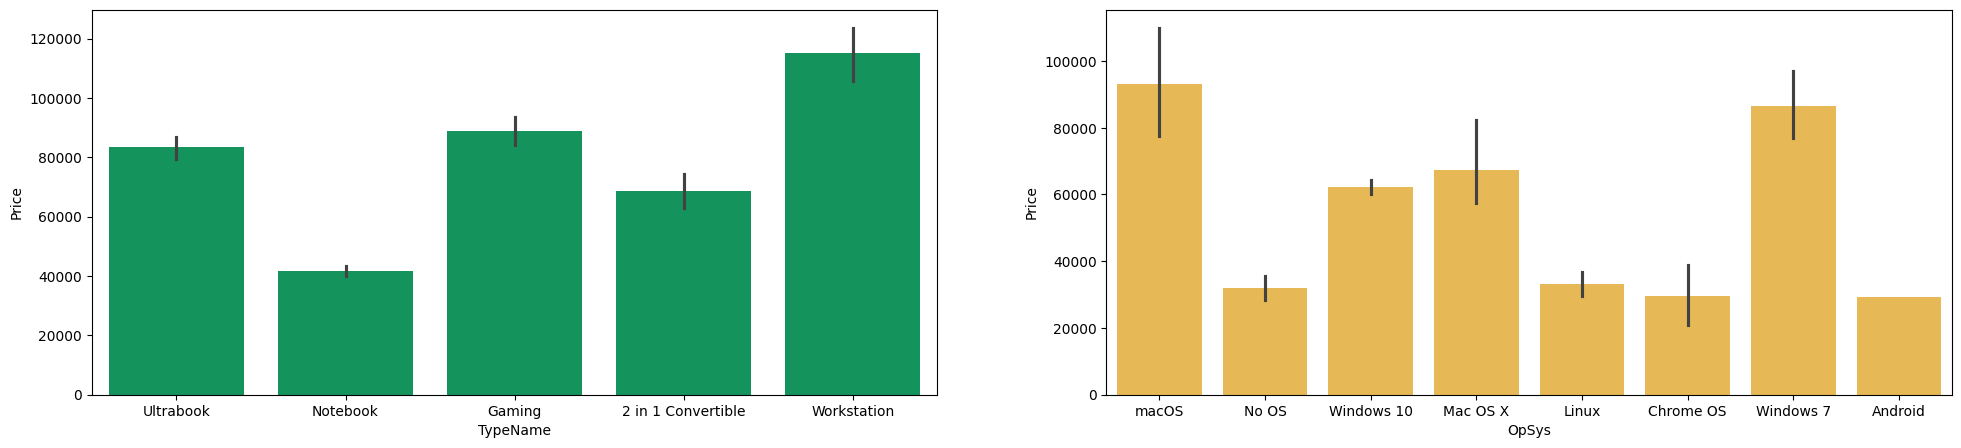

In [191]:
plt.figure(figsize=(24,5))
plt.subplot(1,2,1)
sns.barplot(x='TypeName',y='Price',data=df_laptop,color='#00A860')
plt.subplot(1,2,2)
sns.barplot(x='OpSys',y='Price',data=df_laptop,color='#FFC03E')

<Axes: xlabel='Weight', ylabel='Price'>

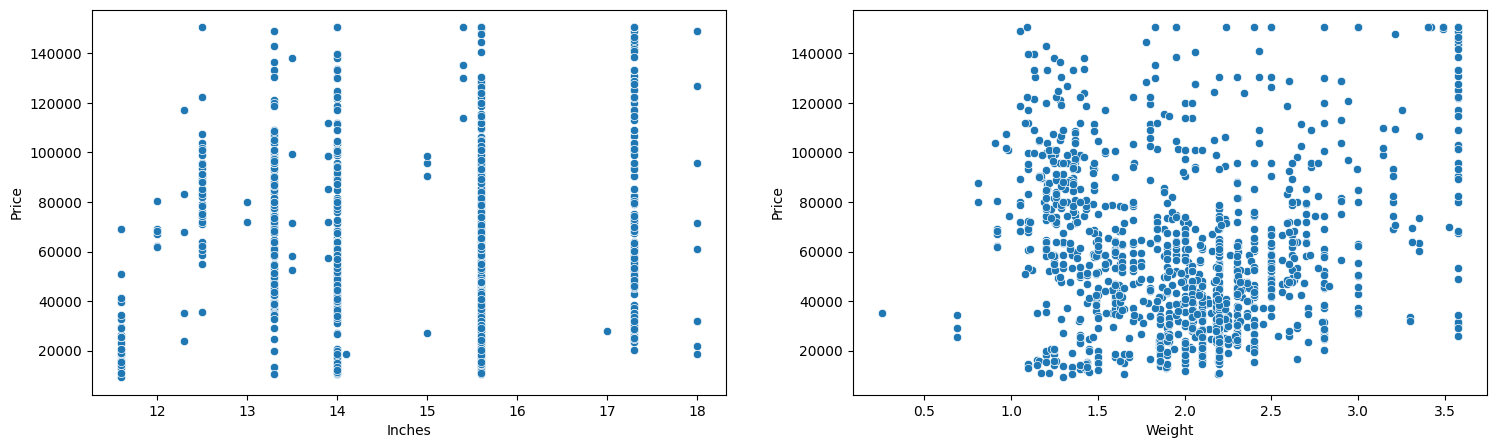

In [192]:
plt.figure(figsize=(18,5))
plt.subplot(1,2,1)
sns.scatterplot(x='Inches',y='Price',data=df_laptop)
plt.subplot(1,2,2)
sns.scatterplot(x='Weight',y='Price',data=df_laptop)

# Screen Resolution Feature Analysis and extraction

In [193]:
df_laptop['ScreenResolution']

,ScreenResolution
0,IPS Panel Retina Display 2560x1600
1,1440x900
2,Full HD 1920x1080
3,IPS Panel Retina Display 2880x1800
4,IPS Panel Retina Display 2560x1600
...,...
1269,1366x768
1270,IPS Panel Full HD / Touchscreen 1920x1080
1271,IPS Panel Quad HD+ / Touchscreen 3200x1800
1272,1366x768


In [194]:
# splitting the screenresolution into panel,display and totalpixels
import re
df_laptop['Resolution'] = df_laptop['ScreenResolution'].str.extract(r'(\d+x\d+)')
df_laptop[['width','height']]=df_laptop['Resolution'].str.split('x', expand=True).astype(int)
df_laptop['Total_Screen_Pixels'] = df_laptop['width'] * df_laptop['height']
df_laptop['Aspect Ratio']=df_laptop['width']/df_laptop['height']
df_laptop['PPI']=((df_laptop['width']**2)+(df_laptop['height']**2))**0.5/df_laptop['Inches']
#df_laptop.drop(['Resolution','width','height'],axis=1,inplace=True)
df_laptop.head()


,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Resolution,width,height,Total_Screen_Pixels,Aspect Ratio,PPI
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,2560x1600,2560,1600,4096000,1.600000,226.983005
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,1440x900,1440,900,1296000,1.600000,127.677940
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,1920x1080,1920,1080,2073600,1.777778,141.211998
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,14,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,2880x1800,2880,1800,5184000,1.600000,220.534624
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,2560x1600,2560,1600,4096000,1.600000,226.983005


In [195]:
# create a new feature IPS, TouchScreen
df_laptop['IPS']=df_laptop['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0)
df_laptop['TouchScreen']=df_laptop['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)
df_laptop.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Resolution,width,height,Total_Screen_Pixels,Aspect Ratio,PPI,IPS,TouchScreen
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,2560x1600,2560,1600,4096000,1.600000,226.983005,1,0
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,1440x900,1440,900,1296000,1.600000,127.677940,0,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,1920x1080,1920,1080,2073600,1.777778,141.211998,0,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,14,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,2880x1800,2880,1800,5184000,1.600000,220.534624,1,0
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,2560x1600,2560,1600,4096000,1.600000,226.983005,1,0


In [196]:
df_laptop.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1244 entries, 0 to 1273
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Company              1244 non-null   object 
 1   TypeName             1244 non-null   object 
 2   Inches               1244 non-null   float64
 3   ScreenResolution     1244 non-null   object 
 4   Cpu                  1244 non-null   object 
 5   Ram                  1244 non-null   int64  
 6   Memory               1244 non-null   object 
 7   Gpu                  1244 non-null   object 
 8   OpSys                1244 non-null   object 
 9   Weight               1244 non-null   float64
 10  Price                1244 non-null   float64
 11  Resolution           1244 non-null   object 
 12  width                1244 non-null   int64  
 13  height               1244 non-null   int64  
 14  Total_Screen_Pixels  1244 non-null   int64  
 15  Aspect Ratio         1244 non-null   float6

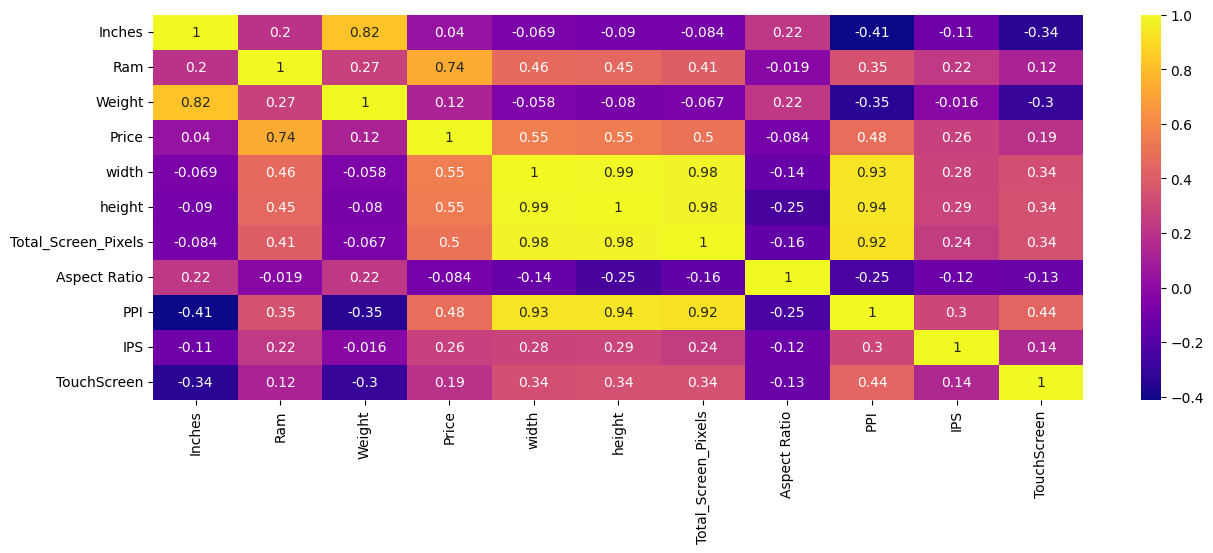

In [197]:
# check the correlation
numeric_df = df_laptop.select_dtypes(include=['number'])
# Create the heatmap
plt.figure(figsize=(15,5))
sns.heatmap(numeric_df.corr(), annot=True, cmap='plasma')
plt.show()

In [198]:
# remove the screen resolution,height, width,totalpixels,aspect ratio,inches
df_laptop.drop(['ScreenResolution','Resolution','width','height','Total_Screen_Pixels','Aspect Ratio','Inches'],axis=1,inplace=True)
df_laptop

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,PPI,IPS,TouchScreen
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,226.983005,1,0
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,127.677940,0,0
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,141.211998,0,0
3,Apple,Ultrabook,Intel Core i7 2.7GHz,14,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,220.534624,1,0
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,226.983005,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1269,Asus,Notebook,Intel Core i7 6500U 2.5GHz,4,500GB HDD,Nvidia GeForce 920M,Windows 10,2.20,38378.6496,100.454670,0,0
1270,Lenovo,2 in 1 Convertible,Intel Core i7 6500U 2.5GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.80,33992.6400,157.350512,1,1
1271,Lenovo,2 in 1 Convertible,Intel Core i7 6500U 2.5GHz,14,512GB SSD,Intel HD Graphics 520,Windows 10,1.30,79866.7200,276.053530,1,1
1272,Lenovo,Notebook,Intel Celeron Dual Core N3050 1.6GHz,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.50,12201.1200,111.935204,0,0


# Cpu feature Analysis

In [199]:
cpu_counts = df_laptop['Cpu'].value_counts()
cpu_counts[cpu_counts > 10]

,count
Cpu,
Intel Core i5 7200U 2.5GHz,183
Intel Core i7 7700HQ 2.8GHz,142
Intel Core i7 7500U 2.7GHz,126
Intel Core i7 8550U 1.8GHz,72
Intel Core i5 8250U 1.6GHz,68
Intel Core i5 6200U 2.3GHz,66
Intel Core i3 6006U 2GHz,62
Intel Core i7 6500U 2.5GHz,41
Intel Core i7 6700HQ 2.6GHz,41


In [200]:
cpu_counts[(cpu_counts <= 10)  & (cpu_counts > 4)]

,count
Cpu,
Intel Core i7 6820HK 2.7GHz,10
Intel Core i3 6100U 2.3GHz,9
Intel Core i3 7130U 2.7GHz,8
Intel Core i5 6300HQ 2.3GHz,7
Intel Core i7 6820HQ 2.7GHz,7
Intel Core i7 7820HK 2.9GHz,7
AMD A6-Series 9220 2.5GHz,7
Intel Celeron Quad Core N3450 1.1GHz,5
AMD A12-Series 9720P 3.6GHz,5


In [201]:
# from cpu check and assign the cpu
df_laptop['Cpu_Brand'] = df_laptop['Cpu'].apply(lambda x: "Intel Core i7" if "Intel Core i7" in x else ("Intel Core i5" if "Intel Core i5" in x else ("Intel Core i3" if "Intel Core i3" in x else ("Intel Celeron Dual" if "Intel Celeron Dual Core" in x else ("Intel Pentium Quad" if "Intel Pentium Quad Core" in x else ("AMD" if "AMD" in x else "Other Intel"))))))
df_laptop['Cpu_Brand'].value_counts()

,count
Cpu_Brand,
Intel Core i7,503
Intel Core i5,410
Intel Core i3,132
Intel Celeron Dual,68
AMD,60
Other Intel,44
Intel Pentium Quad,27


<Axes: xlabel='Cpu_Brand', ylabel='Price'>

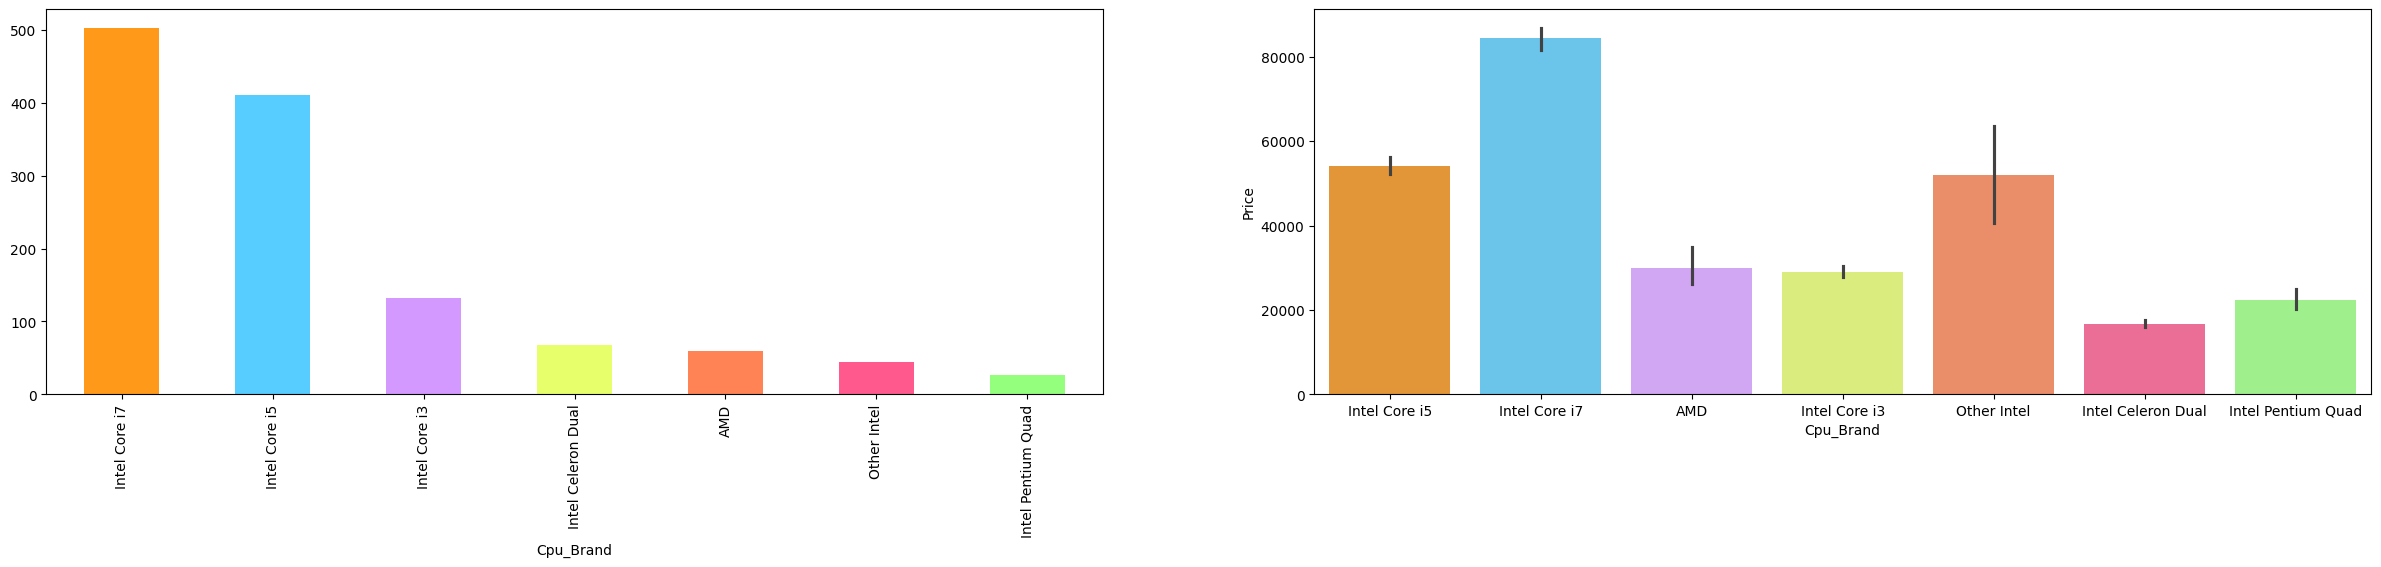

In [202]:
plt.figure(figsize=(30,5))
plt.subplot(1,2,1)
df_laptop['Cpu_Brand'].value_counts().plot(kind='bar',color=['#FF991A','#56CCFF','#D399FF','#E7FF6A','#FF8354','#FF598E','#94FF7D'])
plt.subplot(1,2,2)
sns.barplot(x='Cpu_Brand',y='Price',data=df_laptop,palette=['#FF991A','#56CCFF','#D399FF','#E7FF6A','#FF8354','#FF598E','#94FF7D'])

In [203]:
# extract
df_laptop['Clock_Speed_GHz'] = df_laptop['Cpu'].str.extract(r'(\d+\.?\d*GHz)').fillna(np.nan)
df_laptop['Clock_Speed_GHz'].replace('GHz','',regex=True,inplace=True)
df_laptop['Clock_Speed_GHz'].value_counts()

,count
Clock_Speed_GHz,
2.5,275
2.8,161
2.7,157
1.6,117
2.3,84
1.8,77
2.6,73
2,65
1.1,53


In [204]:
# categorize the clock speed in to low, medium, high
df_laptop['Clock_Speed_GHz'] = df_laptop['Clock_Speed_GHz'].astype(float)
df_laptop['Clock_Speed_Category'] = pd.cut(df_laptop['Clock_Speed_GHz'], bins=[0, 2.0, 3.0, float('inf')], labels=['Low', 'Medium', 'High'])
df_laptop['Clock_Speed_Category'].value_counts()
df_laptop['Clock_Speed_Category'].astype('object')

,Clock_Speed_Category
0,Medium
1,Low
2,Medium
3,Medium
4,High
...,...
1269,Medium
1270,Medium
1271,Medium
1272,Low


<Axes: xlabel='Clock_Speed_Category'>

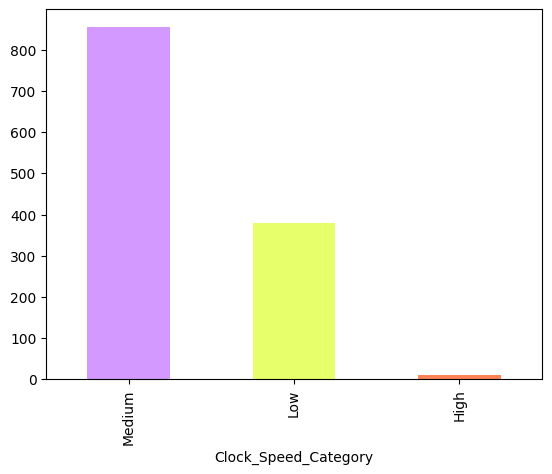

In [205]:
df_laptop['Clock_Speed_Category'].value_counts().plot(kind='bar',color=['#D399FF','#E7FF6A','#FF8354'])

In [206]:
df_laptop.drop(columns=['Cpu','Clock_Speed_GHz'],axis=1,inplace=True)
df_laptop.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,PPI,IPS,TouchScreen,Cpu_Brand,Clock_Speed_Category
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,226.983005,1,0,Intel Core i5,Medium
1,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,127.677940,0,0,Intel Core i5,Low
2,HP,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,141.211998,0,0,Intel Core i5,Medium
3,Apple,Ultrabook,14,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,220.534624,1,0,Intel Core i7,Medium
4,Apple,Ultrabook,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,226.983005,1,0,Intel Core i5,High


# Ram Feature Analysis

<Axes: xlabel='Ram', ylabel='Price'>

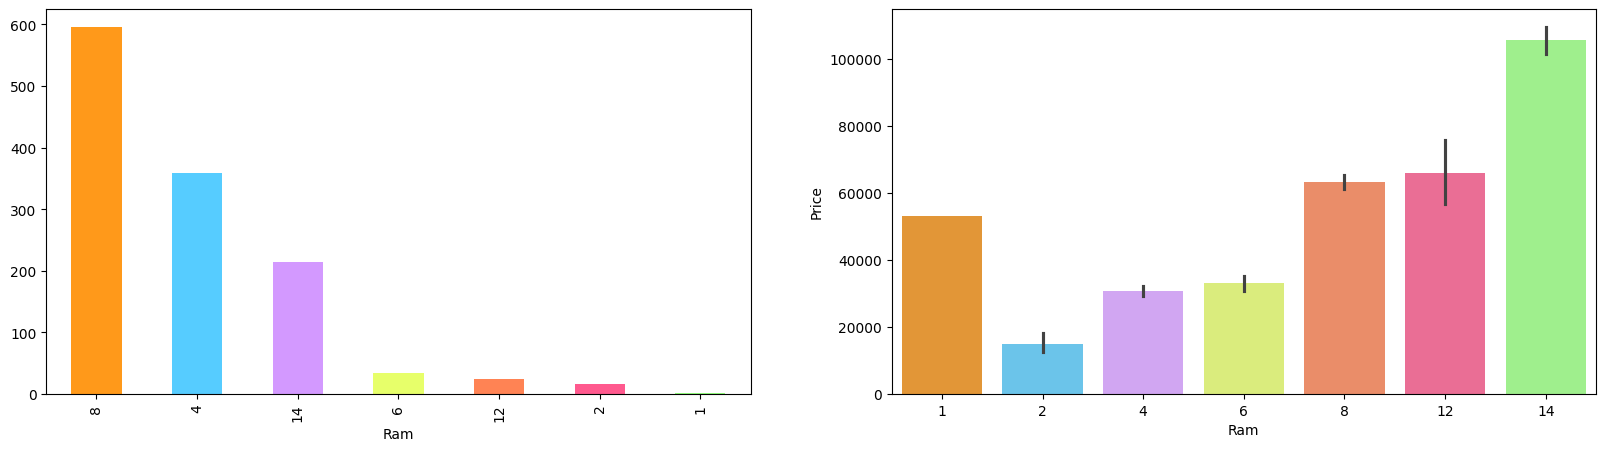

In [207]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
df_laptop['Ram'].value_counts().plot(kind='bar',color=['#FF991A','#56CCFF','#D399FF','#E7FF6A','#FF8354','#FF598E','#94FF7D'])
plt.subplot(1,2,2)
sns.barplot(x='Ram',y='Price',data=df_laptop,palette=['#FF991A','#56CCFF','#D399FF','#E7FF6A','#FF8354','#FF598E','#94FF7D'])

# Memory feature Analysis

In [208]:
# split into two by + and replace TB to GB
df_laptop[['Primary_Storage','Secondary_Storage']] = df_laptop['Memory'].str.split('+', expand=True)
for column in ['Primary_Storage', 'Secondary_Storage']:
    df_laptop[column] = df_laptop[column].str.strip()  # Apply strip to the Series
    df_laptop[column] = df_laptop[column].str.replace('GB', '') # Apply replace to the Series
df_laptop

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,PPI,IPS,TouchScreen,Cpu_Brand,Clock_Speed_Category,Primary_Storage,Secondary_Storage
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,226.983005,1,0,Intel Core i5,Medium,128 SSD,None
1,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,127.677940,0,0,Intel Core i5,Low,128 Flash Storage,None
2,HP,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,141.211998,0,0,Intel Core i5,Medium,256 SSD,None
3,Apple,Ultrabook,14,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,220.534624,1,0,Intel Core i7,Medium,512 SSD,None
4,Apple,Ultrabook,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,226.983005,1,0,Intel Core i5,High,256 SSD,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1269,Asus,Notebook,4,500GB HDD,Nvidia GeForce 920M,Windows 10,2.20,38378.6496,100.454670,0,0,Intel Core i7,Medium,500 HDD,None
1270,Lenovo,2 in 1 Convertible,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.80,33992.6400,157.350512,1,1,Intel Core i7,Medium,128 SSD,None
1271,Lenovo,2 in 1 Convertible,14,512GB SSD,Intel HD Graphics 520,Windows 10,1.30,79866.7200,276.053530,1,1,Intel Core i7,Medium,512 SSD,None
1272,Lenovo,Notebook,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.50,12201.1200,111.935204,0,0,Intel Celeron Dual,Low,64 Flash Storage,None


In [209]:
for column in ['Primary_Storage', 'Secondary_Storage']:
    df_laptop[column] = df_laptop[column].str.strip()  # Apply strip to the Series
    df_laptop[column] = df_laptop[column].str.replace('1TB', '1024')
    df_laptop[column] = df_laptop[column].str.replace('2TB', '2048')
    df_laptop[column] = df_laptop[column].str.replace('1.0TB', '1024')
df_laptop['Secondary_Storage'].fillna(0,inplace=True)
df_laptop

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,PPI,IPS,TouchScreen,Cpu_Brand,Clock_Speed_Category,Primary_Storage,Secondary_Storage
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,226.983005,1,0,Intel Core i5,Medium,128 SSD,0
1,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,127.677940,0,0,Intel Core i5,Low,128 Flash Storage,0
2,HP,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,141.211998,0,0,Intel Core i5,Medium,256 SSD,0
3,Apple,Ultrabook,14,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,220.534624,1,0,Intel Core i7,Medium,512 SSD,0
4,Apple,Ultrabook,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,226.983005,1,0,Intel Core i5,High,256 SSD,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1269,Asus,Notebook,4,500GB HDD,Nvidia GeForce 920M,Windows 10,2.20,38378.6496,100.454670,0,0,Intel Core i7,Medium,500 HDD,0
1270,Lenovo,2 in 1 Convertible,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.80,33992.6400,157.350512,1,1,Intel Core i7,Medium,128 SSD,0
1271,Lenovo,2 in 1 Convertible,14,512GB SSD,Intel HD Graphics 520,Windows 10,1.30,79866.7200,276.053530,1,1,Intel Core i7,Medium,512 SSD,0
1272,Lenovo,Notebook,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.50,12201.1200,111.935204,0,0,Intel Celeron Dual,Low,64 Flash Storage,0


In [210]:
df_laptop.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1244 entries, 0 to 1273
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Company               1244 non-null   object  
 1   TypeName              1244 non-null   object  
 2   Ram                   1244 non-null   int64   
 3   Memory                1244 non-null   object  
 4   Gpu                   1244 non-null   object  
 5   OpSys                 1244 non-null   object  
 6   Weight                1244 non-null   float64 
 7   Price                 1244 non-null   float64 
 8   PPI                   1244 non-null   float64 
 9   IPS                   1244 non-null   int64   
 10  TouchScreen           1244 non-null   int64   
 11  Cpu_Brand             1244 non-null   object  
 12  Clock_Speed_Category  1244 non-null   category
 13  Primary_Storage       1244 non-null   object  
 14  Secondary_Storage     1244 non-null   object  
dtypes: catego

In [211]:
# create a column SSD HDD FlashStorage Hybrid and assign the value if present else 0
df_laptop['SSD_P'] = df_laptop['Primary_Storage'].astype(str).apply(lambda x: '1' if 'SSD' in x else '0')
df_laptop['HDD_P'] = df_laptop['Primary_Storage'].astype(str).apply(lambda x: '1' if 'HDD' in x else '0')
df_laptop['FlashStorage_P'] = df_laptop['Primary_Storage'].astype(str).apply(lambda x: '1' if 'Flash Storage' in x else '0')
df_laptop['Hybrid_P'] = df_laptop['Primary_Storage'].astype(str).apply(lambda x: '1' if 'Hybrid' in x else '0')
df_laptop['SSD_P']=df_laptop['SSD_P'].astype(int)
df_laptop['HDD_P']=df_laptop['HDD_P'].astype(int)
df_laptop['FlashStorage_P']=df_laptop['FlashStorage_P'].astype(int)
df_laptop['Hybrid_P']=df_laptop['Hybrid_P'].astype(int)



df_laptop['SSD_S']=df_laptop['Secondary_Storage'].astype(str).apply(lambda x:'1' if 'SSD' in x else '0')
df_laptop['HDD_S']=df_laptop['Secondary_Storage'].astype(str).apply(lambda x:'1' if 'HDD' in x else '0')
df_laptop['FlashStorage_S']=df_laptop['Secondary_Storage'].astype(str).apply(lambda x:'1' if 'Flash Storage' in x else '0')
df_laptop['Hybrid_S']=df_laptop['Secondary_Storage'].astype(str).apply(lambda x:'1' if 'Hybrid' in x else '0')
df_laptop['SSD_S']=df_laptop['SSD_S'].astype(int)
df_laptop['HDD_S']=df_laptop['HDD_S'].astype(int)
df_laptop['FlashStorage_S']=df_laptop['FlashStorage_S'].astype(int)
df_laptop['Hybrid_S']=df_laptop['Hybrid_S'].astype(int)





In [212]:
# remove all characters except number from primary and secondary storage
df_laptop['Primary_Storage'] = df_laptop['Primary_Storage'].str.replace(r'\D', '', regex=True)
df_laptop['Secondary_Storage'] = df_laptop['Secondary_Storage'].str.replace(r'\D', '', regex=True)

# Replace empty strings with '0' to allow for integer conversion
df_laptop['Primary_Storage'] = df_laptop['Primary_Storage'].replace('', '0')
df_laptop['Secondary_Storage'] = df_laptop['Secondary_Storage'].replace('', '0')

# Fill NaN values with 0
df_laptop[['Primary_Storage','Secondary_Storage']] = df_laptop[['Primary_Storage','Secondary_Storage']].fillna(0)

# Convert to integers
df_laptop[['Primary_Storage', 'Secondary_Storage']] = df_laptop[['Primary_Storage', 'Secondary_Storage',]].astype(int)

df_laptop


,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,PPI,IPS,...,Primary_Storage,Secondary_Storage,SSD_P,HDD_P,FlashStorage_P,Hybrid_P,SSD_S,HDD_S,FlashStorage_S,Hybrid_S
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,226.983005,1,...,128,0,1,0,0,0,0,0,0,0
1,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,127.677940,0,...,128,0,0,0,1,0,0,0,0,0
2,HP,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,141.211998,0,...,256,0,1,0,0,0,0,0,0,0
3,Apple,Ultrabook,14,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,220.534624,1,...,512,0,1,0,0,0,0,0,0,0
4,Apple,Ultrabook,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,226.983005,1,...,256,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1269,Asus,Notebook,4,500GB HDD,Nvidia GeForce 920M,Windows 10,2.20,38378.6496,100.454670,0,...,500,0,0,1,0,0,0,0,0,0
1270,Lenovo,2 in 1 Convertible,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.80,33992.6400,157.350512,1,...,128,0,1,0,0,0,0,0,0,0
1271,Lenovo,2 in 1 Convertible,14,512GB SSD,Intel HD Graphics 520,Windows 10,1.30,79866.7200,276.053530,1,...,512,0,1,0,0,0,0,0,0,0
1272,Lenovo,Notebook,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.50,12201.1200,111.935204,0,...,64,0,0,0,1,0,0,0,0,0


In [213]:
# now add primary and secondary of ssd hdd hybrid flashstorage
df_laptop['SSD']=(df_laptop['SSD_P']*df_laptop['Primary_Storage'])+(df_laptop['SSD_S']*df_laptop['Secondary_Storage'])
df_laptop['HDD']=(df_laptop['HDD_P']*df_laptop['Primary_Storage'])+(df_laptop['HDD_S']*df_laptop['Secondary_Storage'])
df_laptop['Hybrid']=(df_laptop['Hybrid_P']*df_laptop['Primary_Storage'])+(df_laptop['Hybrid_S']*df_laptop['Secondary_Storage'])
df_laptop['FlashStorage']=(df_laptop['FlashStorage_P']*df_laptop['Primary_Storage'])+(df_laptop['FlashStorage_S']*df_laptop['Secondary_Storage'])


#now drop unnecessary columns
df_laptop.drop(columns=['Memory','Primary_Storage','Secondary_Storage','SSD_P','HDD_P','Hybrid_P','FlashStorage_P','SSD_S','HDD_S','Hybrid_S','FlashStorage_S'],axis=1,inplace=True)
df_laptop

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,PPI,IPS,TouchScreen,Cpu_Brand,Clock_Speed_Category,SSD,HDD,Hybrid,FlashStorage
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,226.983005,1,0,Intel Core i5,Medium,128,0,0,0
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,127.677940,0,0,Intel Core i5,Low,0,0,0,128
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,141.211998,0,0,Intel Core i5,Medium,256,0,0,0
3,Apple,Ultrabook,14,AMD Radeon Pro 455,macOS,1.83,135195.3360,220.534624,1,0,Intel Core i7,Medium,512,0,0,0
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,226.983005,1,0,Intel Core i5,High,256,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1269,Asus,Notebook,4,Nvidia GeForce 920M,Windows 10,2.20,38378.6496,100.454670,0,0,Intel Core i7,Medium,0,500,0,0
1270,Lenovo,2 in 1 Convertible,4,Intel HD Graphics 520,Windows 10,1.80,33992.6400,157.350512,1,1,Intel Core i7,Medium,128,0,0,0
1271,Lenovo,2 in 1 Convertible,14,Intel HD Graphics 520,Windows 10,1.30,79866.7200,276.053530,1,1,Intel Core i7,Medium,512,0,0,0
1272,Lenovo,Notebook,2,Intel HD Graphics,Windows 10,1.50,12201.1200,111.935204,0,0,Intel Celeron Dual,Low,0,0,0,64


In [214]:
df_laptop.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1244 entries, 0 to 1273
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Company               1244 non-null   object  
 1   TypeName              1244 non-null   object  
 2   Ram                   1244 non-null   int64   
 3   Gpu                   1244 non-null   object  
 4   OpSys                 1244 non-null   object  
 5   Weight                1244 non-null   float64 
 6   Price                 1244 non-null   float64 
 7   PPI                   1244 non-null   float64 
 8   IPS                   1244 non-null   int64   
 9   TouchScreen           1244 non-null   int64   
 10  Cpu_Brand             1244 non-null   object  
 11  Clock_Speed_Category  1244 non-null   category
 12  SSD                   1244 non-null   int64   
 13  HDD                   1244 non-null   int64   
 14  Hybrid                1244 non-null   int64   
 15  FlashStor

In [215]:
#check the correlation with price
numeric_df = df_laptop.select_dtypes(include=['number'])
numeric_df.corr()['Price']

,Price
Ram,0.735598
Weight,0.123053
Price,1.000000
PPI,0.481716
IPS,0.263875
TouchScreen,0.190539
SSD,0.661541
HDD,-0.095155
Hybrid,0.020608
FlashStorage,-0.034551


In [216]:
# HDD, Hybrid, FlashStorage has weak correlation with price remove them
df_laptop.drop(columns=['HDD','Hybrid','FlashStorage'],axis=1,inplace=True)
df_laptop

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,PPI,IPS,TouchScreen,Cpu_Brand,Clock_Speed_Category,SSD
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,226.983005,1,0,Intel Core i5,Medium,128
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,127.677940,0,0,Intel Core i5,Low,0
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,141.211998,0,0,Intel Core i5,Medium,256
3,Apple,Ultrabook,14,AMD Radeon Pro 455,macOS,1.83,135195.3360,220.534624,1,0,Intel Core i7,Medium,512
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,226.983005,1,0,Intel Core i5,High,256
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1269,Asus,Notebook,4,Nvidia GeForce 920M,Windows 10,2.20,38378.6496,100.454670,0,0,Intel Core i7,Medium,0
1270,Lenovo,2 in 1 Convertible,4,Intel HD Graphics 520,Windows 10,1.80,33992.6400,157.350512,1,1,Intel Core i7,Medium,128
1271,Lenovo,2 in 1 Convertible,14,Intel HD Graphics 520,Windows 10,1.30,79866.7200,276.053530,1,1,Intel Core i7,Medium,512
1272,Lenovo,Notebook,2,Intel HD Graphics,Windows 10,1.50,12201.1200,111.935204,0,0,Intel Celeron Dual,Low,0


# GPU Feature Analysis

In [217]:
df_laptop['Gpu'].value_counts().head(30)



,count
Gpu,
Intel HD Graphics 620,269
Intel HD Graphics 520,177
Intel UHD Graphics 620,66
Nvidia GeForce GTX 1050,64
Nvidia GeForce GTX 1060,48
Nvidia GeForce 940MX,42
Intel HD Graphics 500,39
AMD Radeon 530,39
Intel HD Graphics 400,30


In [218]:
#remove the words contains numbers and alphabets.
df_laptop['Gpu_Brands']=df_laptop['Gpu'].str.replace(r'\b\w*[0-9]+\w*\b', '', regex=True)
#remove the spaces before and after
df_laptop['Gpu_Brands']=df_laptop['Gpu_Brands'].str.strip()
df_laptop['Gpu_Brands'].value_counts()

,count
Gpu_Brands,
Intel HD Graphics,603
Nvidia GeForce GTX,200
AMD Radeon,138
Nvidia GeForce,122
Intel UHD Graphics,66
Nvidia Quadro,31
Nvidia GeForce GTX Ti,27
AMD Radeon RX,12
AMD Radeon Graphics,10


In [219]:
# only top 14 remains and converted reaminign into others
top_14=["Intel HD Graphics", "Nvidia GeForce GTX", "AMD Radeon","Nvidia GeForce","Intel UHD Graphics", "Nvidia Quadro", "Nvidia GeForce GTX Ti", "AMD Radeon RX", "AMD Radeon Graphics", "Intel Iris Plus Graphics", "AMD FirePro", "Nvidia GeForce GT", "Intel Iris Graphics", "AMD Radeon Pro"]
df_laptop['Gpu_Brand'] = df_laptop['Gpu_Brands'].apply(lambda x: x if x in top_14 else 'Other')
df_laptop['Gpu_Brand'].value_counts()

,count
Gpu_Brand,
Intel HD Graphics,603
Nvidia GeForce GTX,200
AMD Radeon,138
Nvidia GeForce,122
Intel UHD Graphics,66
Other,46
Nvidia Quadro,31
AMD Radeon RX,12
Intel Iris Plus Graphics,10


<Axes: xlabel='Gpu_Brand'>

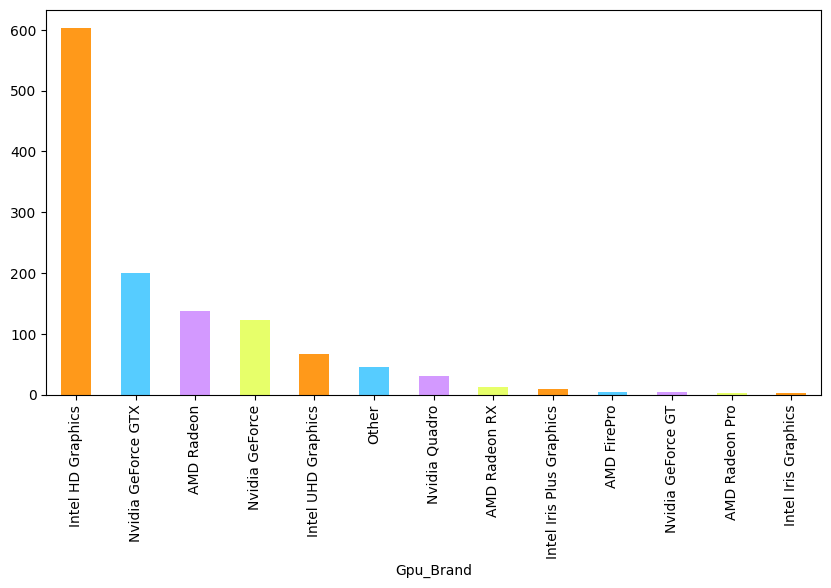

In [220]:
plt.figure(figsize=(10,5))
df_laptop['Gpu_Brand'].value_counts().plot(kind='bar',color=['#FF991A','#56CCFF','#D399FF','#E7FF6A'])

<Axes: xlabel='Gpu_Brand', ylabel='Price'>

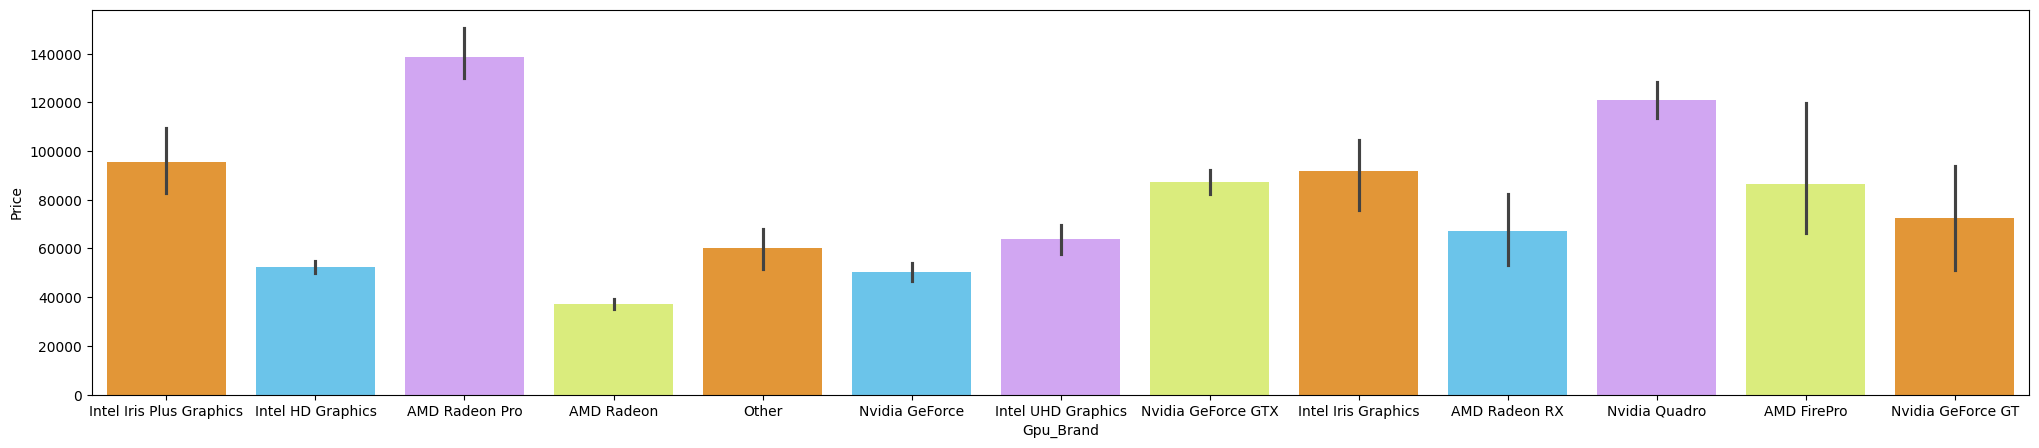

In [221]:
plt.figure(figsize=(25,5))
sns.barplot(x='Gpu_Brand',y='Price',data=df_laptop,palette=['#FF991A','#56CCFF','#D399FF','#E7FF6A'])

In [222]:
# remove the Gpu feature
df_laptop.drop(columns=['Gpu','Gpu_Brands'],axis=1,inplace=True)
df_laptop

,Company,TypeName,Ram,OpSys,Weight,Price,PPI,IPS,TouchScreen,Cpu_Brand,Clock_Speed_Category,SSD,Gpu_Brand
0,Apple,Ultrabook,8,macOS,1.37,71378.6832,226.983005,1,0,Intel Core i5,Medium,128,Intel Iris Plus Graphics
1,Apple,Ultrabook,8,macOS,1.34,47895.5232,127.677940,0,0,Intel Core i5,Low,0,Intel HD Graphics
2,HP,Notebook,8,No OS,1.86,30636.0000,141.211998,0,0,Intel Core i5,Medium,256,Intel HD Graphics
3,Apple,Ultrabook,14,macOS,1.83,135195.3360,220.534624,1,0,Intel Core i7,Medium,512,AMD Radeon Pro
4,Apple,Ultrabook,8,macOS,1.37,96095.8080,226.983005,1,0,Intel Core i5,High,256,Intel Iris Plus Graphics
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1269,Asus,Notebook,4,Windows 10,2.20,38378.6496,100.454670,0,0,Intel Core i7,Medium,0,Nvidia GeForce
1270,Lenovo,2 in 1 Convertible,4,Windows 10,1.80,33992.6400,157.350512,1,1,Intel Core i7,Medium,128,Intel HD Graphics
1271,Lenovo,2 in 1 Convertible,14,Windows 10,1.30,79866.7200,276.053530,1,1,Intel Core i7,Medium,512,Intel HD Graphics
1272,Lenovo,Notebook,2,Windows 10,1.50,12201.1200,111.935204,0,0,Intel Celeron Dual,Low,0,Intel HD Graphics


# Operating System Analysis

In [223]:
df_laptop['OpSys'].value_counts()

,count
OpSys,
Windows 10,1030
No OS,63
Linux,57
Windows 7,45
Chrome OS,27
macOS,13
Mac OS X,8
Android,1


<Axes: xlabel='OpSys', ylabel='Price'>

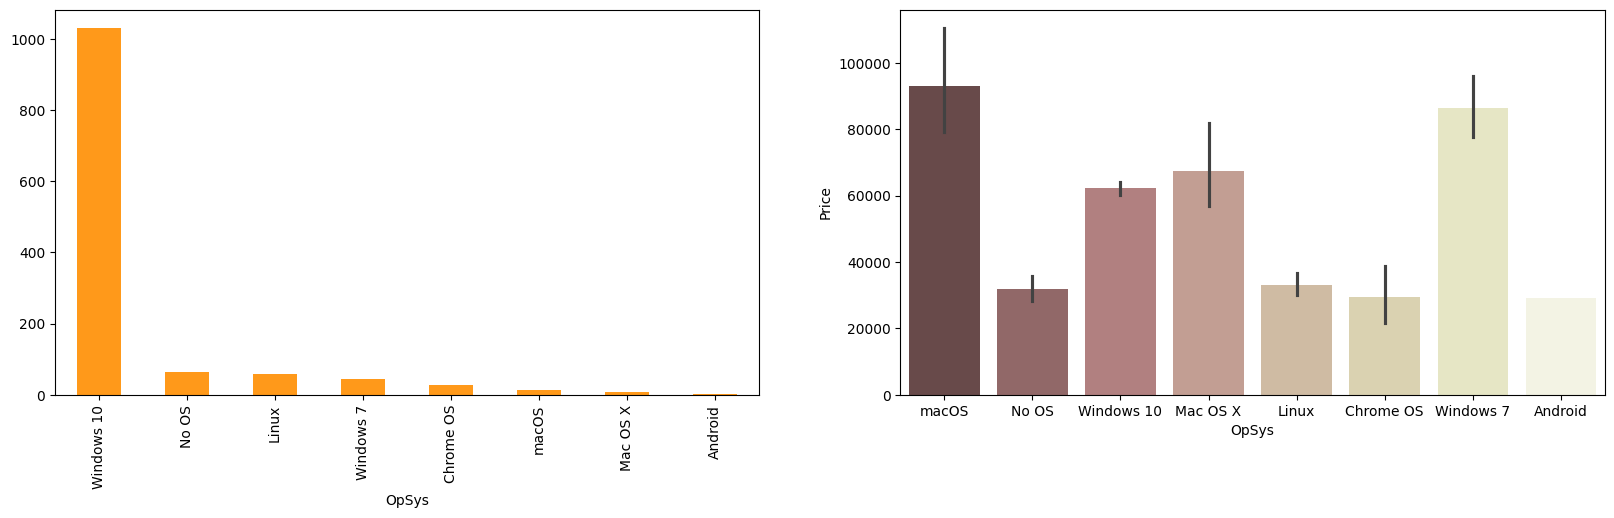

In [224]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
df_laptop['OpSys'].value_counts().plot(kind='bar',color=['#FF991A'])
plt.subplot(1,2,2)
sns.barplot(x='OpSys',y='Price',data=df_laptop,palette='pink')

In [225]:
# reduce the ops values
df_laptop['Op_Sys'] = df_laptop['OpSys'].apply(lambda x: "Windows" if "Windows" in x else ("Mac" if "Mac" in x else ("Linux" if "Linux" in x else "Other")))
df_laptop['Op_Sys'].value_counts()

,count
Op_Sys,
Windows,1075
Other,104
Linux,57
Mac,8


<Axes: xlabel='Op_Sys', ylabel='Price'>

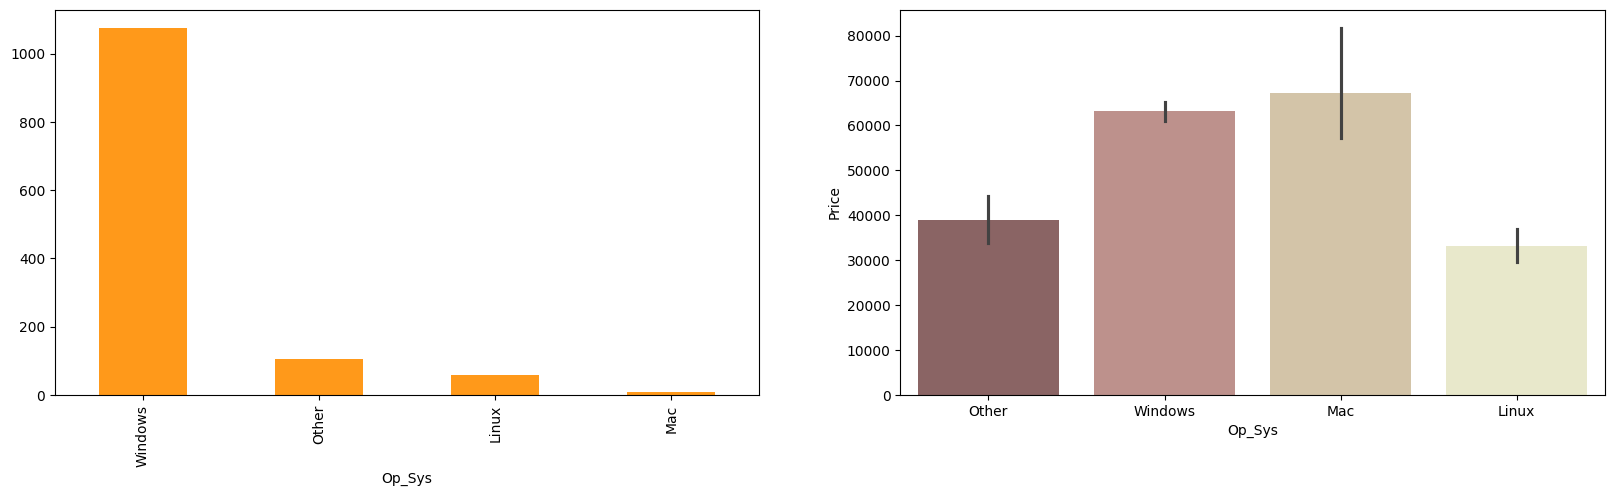

In [226]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
df_laptop['Op_Sys'].value_counts().plot(kind='bar',color=['#FF991A'])
plt.subplot(1,2,2)
sns.barplot(x='Op_Sys',y='Price',data=df_laptop,palette='pink')

In [227]:
#remove Opsys
df_laptop.drop(columns=['OpSys'],axis=1,inplace=True)
df_laptop

,Company,TypeName,Ram,Weight,Price,PPI,IPS,TouchScreen,Cpu_Brand,Clock_Speed_Category,SSD,Gpu_Brand,Op_Sys
0,Apple,Ultrabook,8,1.37,71378.6832,226.983005,1,0,Intel Core i5,Medium,128,Intel Iris Plus Graphics,Other
1,Apple,Ultrabook,8,1.34,47895.5232,127.677940,0,0,Intel Core i5,Low,0,Intel HD Graphics,Other
2,HP,Notebook,8,1.86,30636.0000,141.211998,0,0,Intel Core i5,Medium,256,Intel HD Graphics,Other
3,Apple,Ultrabook,14,1.83,135195.3360,220.534624,1,0,Intel Core i7,Medium,512,AMD Radeon Pro,Other
4,Apple,Ultrabook,8,1.37,96095.8080,226.983005,1,0,Intel Core i5,High,256,Intel Iris Plus Graphics,Other
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1269,Asus,Notebook,4,2.20,38378.6496,100.454670,0,0,Intel Core i7,Medium,0,Nvidia GeForce,Windows
1270,Lenovo,2 in 1 Convertible,4,1.80,33992.6400,157.350512,1,1,Intel Core i7,Medium,128,Intel HD Graphics,Windows
1271,Lenovo,2 in 1 Convertible,14,1.30,79866.7200,276.053530,1,1,Intel Core i7,Medium,512,Intel HD Graphics,Windows
1272,Lenovo,Notebook,2,1.50,12201.1200,111.935204,0,0,Intel Celeron Dual,Low,0,Intel HD Graphics,Windows


# Weight Column Analysis

In [228]:
df_laptop['Weight'].unique()

array([1.37 , 1.34 , 1.86 , 1.83 , 2.1  , 2.04 , 1.3  , 1.6  , 2.2  ,
       0.92 , 1.22 , 2.5  , 1.62 , 1.91 , 2.3  , 1.35 , 1.88 , 1.89 ,
       1.65 , 2.71 , 1.2  , 1.44 , 2.8  , 2.   , 2.65 , 2.77 , 3.2  ,
       1.49 , 2.4  , 2.13 , 2.43 , 1.7  , 1.4  , 1.8  , 1.9  , 3.   ,
       1.252, 2.7  , 2.02 , 1.63 , 1.96 , 1.21 , 2.45 , 1.25 , 1.5  ,
       2.62 , 1.38 , 1.58 , 1.85 , 1.23 , 2.16 , 2.36 , 3.575, 2.05 ,
       1.32 , 1.75 , 0.97 , 2.56 , 1.48 , 1.74 , 1.1  , 1.56 , 2.03 ,
       1.05 , 1.29 , 1.95 , 2.06 , 1.12 , 3.49 , 3.35 , 2.23 , 2.9  ,
       2.69 , 2.37 , 2.08 , 1.68 , 1.41 , 2.18 , 2.24 , 2.67 , 2.14 ,
       1.36 , 2.25 , 2.15 , 2.19 , 2.54 , 3.42 , 1.28 , 2.33 , 1.45 ,
       2.79 , 1.26 , 1.84 , 0.255, 2.6  , 2.26 , 3.25 , 1.59 , 1.13 ,
       1.42 , 1.78 , 1.15 , 1.27 , 1.43 , 2.31 , 1.16 , 1.64 , 2.17 ,
       1.47 , 1.79 , 0.91 , 1.99 , 1.93 , 1.87 , 2.63 , 3.4  , 3.14 ,
       1.94 , 1.24 , 2.73 , 1.39 , 2.29 , 2.59 , 2.94 , 1.14 , 3.31 ,
       1.09 , 3.21 ,

In [229]:
# group/bin the weight column into UltraLightweight, lightweight, medium, Heavy
df_laptop['Weight_Category'] = pd.cut(df_laptop['Weight'], bins=[0, 1.2, 1.8, 2.5, float('inf')], labels=['UltraLightweight', 'Lightweight', 'Medium', 'Heavy'])
df_laptop['Weight_Category'].value_counts()

,count
Weight_Category,
Medium,595
Lightweight,350
Heavy,211
UltraLightweight,88


<Axes: xlabel='Weight_Category', ylabel='Price'>

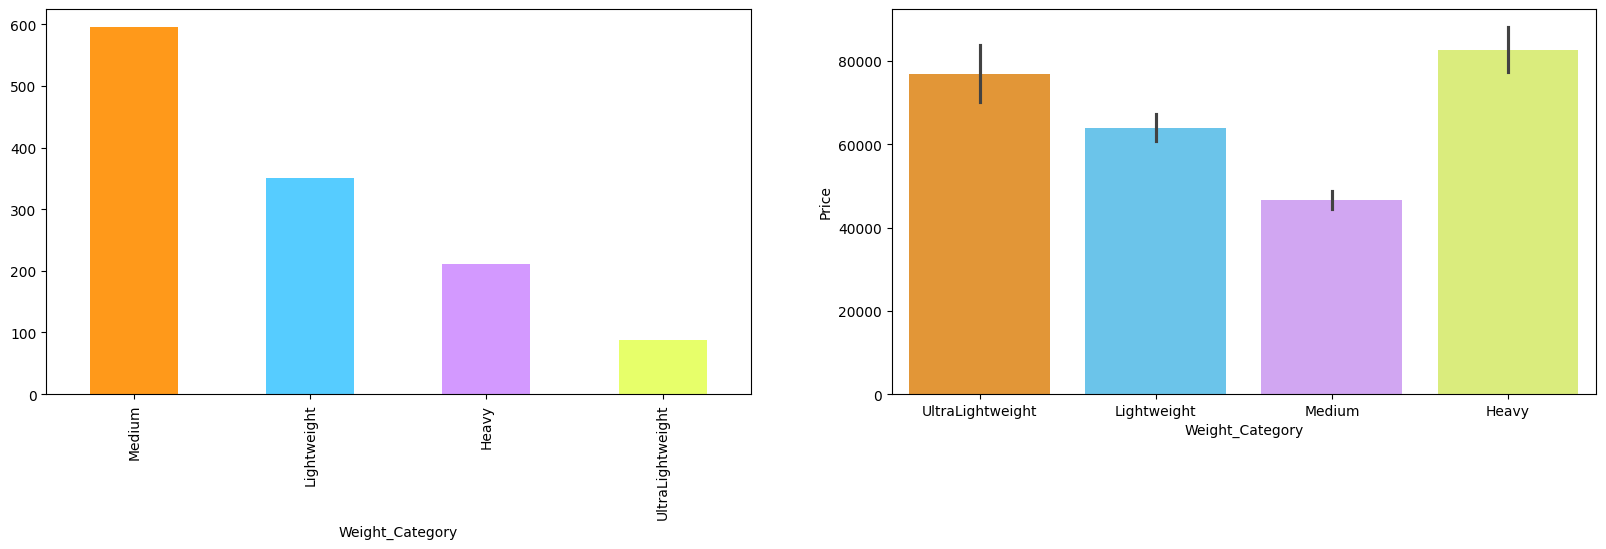

In [230]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
df_laptop['Weight_Category'].value_counts().plot(kind='bar',color=['#FF991A','#56CCFF','#D399FF','#E7FF6A'])
plt.subplot(1,2,2)
sns.barplot(x='Weight_Category',y='Price',data=df_laptop,palette=['#FF991A','#56CCFF','#D399FF','#E7FF6A'])

In [231]:
df_laptop.drop(columns=['Weight'],axis=1,inplace=True)
df_laptop

,Company,TypeName,Ram,Price,PPI,IPS,TouchScreen,Cpu_Brand,Clock_Speed_Category,SSD,Gpu_Brand,Op_Sys,Weight_Category
0,Apple,Ultrabook,8,71378.6832,226.983005,1,0,Intel Core i5,Medium,128,Intel Iris Plus Graphics,Other,Lightweight
1,Apple,Ultrabook,8,47895.5232,127.677940,0,0,Intel Core i5,Low,0,Intel HD Graphics,Other,Lightweight
2,HP,Notebook,8,30636.0000,141.211998,0,0,Intel Core i5,Medium,256,Intel HD Graphics,Other,Medium
3,Apple,Ultrabook,14,135195.3360,220.534624,1,0,Intel Core i7,Medium,512,AMD Radeon Pro,Other,Medium
4,Apple,Ultrabook,8,96095.8080,226.983005,1,0,Intel Core i5,High,256,Intel Iris Plus Graphics,Other,Lightweight
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1269,Asus,Notebook,4,38378.6496,100.454670,0,0,Intel Core i7,Medium,0,Nvidia GeForce,Windows,Medium
1270,Lenovo,2 in 1 Convertible,4,33992.6400,157.350512,1,1,Intel Core i7,Medium,128,Intel HD Graphics,Windows,Lightweight
1271,Lenovo,2 in 1 Convertible,14,79866.7200,276.053530,1,1,Intel Core i7,Medium,512,Intel HD Graphics,Windows,Lightweight
1272,Lenovo,Notebook,2,12201.1200,111.935204,0,0,Intel Celeron Dual,Low,0,Intel HD Graphics,Windows,Lightweight


In [232]:
df_laptop.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1244 entries, 0 to 1273
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Company               1244 non-null   object  
 1   TypeName              1244 non-null   object  
 2   Ram                   1244 non-null   int64   
 3   Price                 1244 non-null   float64 
 4   PPI                   1244 non-null   float64 
 5   IPS                   1244 non-null   int64   
 6   TouchScreen           1244 non-null   int64   
 7   Cpu_Brand             1244 non-null   object  
 8   Clock_Speed_Category  1244 non-null   category
 9   SSD                   1244 non-null   int64   
 10  Gpu_Brand             1244 non-null   object  
 11  Op_Sys                1244 non-null   object  
 12  Weight_Category       1244 non-null   category
dtypes: category(2), float64(2), int64(4), object(5)
memory usage: 119.4+ KB


In [233]:
# check the correlation
numeric_df = df_laptop.select_dtypes(include=['number'])
numeric_df.corr()['Price']

,Price
Ram,0.735598
Price,1.000000
PPI,0.481716
IPS,0.263875
TouchScreen,0.190539
SSD,0.661541


In [234]:
# remove the Touchscreen, IPS
df_laptop.drop(columns=['TouchScreen','IPS'],axis=1,inplace=True)
df_laptop

,Company,TypeName,Ram,Price,PPI,Cpu_Brand,Clock_Speed_Category,SSD,Gpu_Brand,Op_Sys,Weight_Category
0,Apple,Ultrabook,8,71378.6832,226.983005,Intel Core i5,Medium,128,Intel Iris Plus Graphics,Other,Lightweight
1,Apple,Ultrabook,8,47895.5232,127.677940,Intel Core i5,Low,0,Intel HD Graphics,Other,Lightweight
2,HP,Notebook,8,30636.0000,141.211998,Intel Core i5,Medium,256,Intel HD Graphics,Other,Medium
3,Apple,Ultrabook,14,135195.3360,220.534624,Intel Core i7,Medium,512,AMD Radeon Pro,Other,Medium
4,Apple,Ultrabook,8,96095.8080,226.983005,Intel Core i5,High,256,Intel Iris Plus Graphics,Other,Lightweight
...,...,...,...,...,...,...,...,...,...,...,...
1269,Asus,Notebook,4,38378.6496,100.454670,Intel Core i7,Medium,0,Nvidia GeForce,Windows,Medium
1270,Lenovo,2 in 1 Convertible,4,33992.6400,157.350512,Intel Core i7,Medium,128,Intel HD Graphics,Windows,Lightweight
1271,Lenovo,2 in 1 Convertible,14,79866.7200,276.053530,Intel Core i7,Medium,512,Intel HD Graphics,Windows,Lightweight
1272,Lenovo,Notebook,2,12201.1200,111.935204,Intel Celeron Dual,Low,0,Intel HD Graphics,Windows,Lightweight


# Splitting the data set into dependent and independent Variables

In [235]:
from sklearn.model_selection import train_test_split
x=df_laptop.drop(columns=['Price'],axis=1)
y=np.log(df_laptop['Price'])
x

,Company,TypeName,Ram,PPI,Cpu_Brand,Clock_Speed_Category,SSD,Gpu_Brand,Op_Sys,Weight_Category
0,Apple,Ultrabook,8,226.983005,Intel Core i5,Medium,128,Intel Iris Plus Graphics,Other,Lightweight
1,Apple,Ultrabook,8,127.677940,Intel Core i5,Low,0,Intel HD Graphics,Other,Lightweight
2,HP,Notebook,8,141.211998,Intel Core i5,Medium,256,Intel HD Graphics,Other,Medium
3,Apple,Ultrabook,14,220.534624,Intel Core i7,Medium,512,AMD Radeon Pro,Other,Medium
4,Apple,Ultrabook,8,226.983005,Intel Core i5,High,256,Intel Iris Plus Graphics,Other,Lightweight
...,...,...,...,...,...,...,...,...,...,...
1269,Asus,Notebook,4,100.454670,Intel Core i7,Medium,0,Nvidia GeForce,Windows,Medium
1270,Lenovo,2 in 1 Convertible,4,157.350512,Intel Core i7,Medium,128,Intel HD Graphics,Windows,Lightweight
1271,Lenovo,2 in 1 Convertible,14,276.053530,Intel Core i7,Medium,512,Intel HD Graphics,Windows,Lightweight
1272,Lenovo,Notebook,2,111.935204,Intel Celeron Dual,Low,0,Intel HD Graphics,Windows,Lightweight


# Encoding

In [236]:
#DummyEncoding for 'Company', 'TypeName', 'Cpu_Brand', 'Gpu_Brand', 'Op_Sys'
x=pd.get_dummies(x,columns=['Company','TypeName','Cpu_Brand','Gpu_Brand','Op_Sys'])
x



,Ram,PPI,Clock_Speed_Category,SSD,Weight_Category,Company_Acer,Company_Apple,Company_Asus,Company_Chuwi,Company_Dell,...,Gpu_Brand_Intel UHD Graphics,Gpu_Brand_Nvidia GeForce,Gpu_Brand_Nvidia GeForce GT,Gpu_Brand_Nvidia GeForce GTX,Gpu_Brand_Nvidia Quadro,Gpu_Brand_Other,Op_Sys_Linux,Op_Sys_Mac,Op_Sys_Other,Op_Sys_Windows
0,8,226.983005,Medium,128,Lightweight,False,True,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,8,127.677940,Low,0,Lightweight,False,True,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,8,141.211998,Medium,256,Medium,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,14,220.534624,Medium,512,Medium,False,True,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,8,226.983005,High,256,Lightweight,False,True,False,False,False,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1269,4,100.454670,Medium,0,Medium,False,False,True,False,False,...,False,True,False,False,False,False,False,False,False,True
1270,4,157.350512,Medium,128,Lightweight,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1271,14,276.053530,Medium,512,Lightweight,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1272,2,111.935204,Low,0,Lightweight,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [238]:
# Ordinalencoding for 'Clock_Speed_Category', 'Weight_Category'
from sklearn.preprocessing import OrdinalEncoder
ore=OrdinalEncoder()
x['Clock_Speed_Category']=ore.fit_transform(x[['Clock_Speed_Category']])
x['Weight_Category']=ore.fit_transform(x[['Weight_Category']])
x

,Ram,PPI,Clock_Speed_Category,SSD,Weight_Category,Company_Acer,Company_Apple,Company_Asus,Company_Chuwi,Company_Dell,...,Gpu_Brand_Intel UHD Graphics,Gpu_Brand_Nvidia GeForce,Gpu_Brand_Nvidia GeForce GT,Gpu_Brand_Nvidia GeForce GTX,Gpu_Brand_Nvidia Quadro,Gpu_Brand_Other,Op_Sys_Linux,Op_Sys_Mac,Op_Sys_Other,Op_Sys_Windows
0,8,226.983005,2.0,128,1.0,False,True,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,8,127.677940,1.0,0,1.0,False,True,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,8,141.211998,2.0,256,2.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,14,220.534624,2.0,512,2.0,False,True,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,8,226.983005,0.0,256,1.0,False,True,False,False,False,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1269,4,100.454670,2.0,0,2.0,False,False,True,False,False,...,False,True,False,False,False,False,False,False,False,True
1270,4,157.350512,2.0,128,1.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1271,14,276.053530,2.0,512,1.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1272,2,111.935204,1.0,0,1.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


# Feature Scaling

In [239]:
# 'Ram', 'PPI', 'SSD' StandarScale
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x['Ram']=ss.fit_transform(x[['Ram']])
x['PPI']=ss.fit_transform(x[['PPI']])
x['SSD']=ss.fit_transform(x[['SSD']])


# Model Implementation
## Linear Regression

In [248]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)
print(x_train.ndim)
print(x_test.ndim)
print(y_train.ndim)
print(y_test.ndim)


(995, 53)
(249, 53)
(995,)
(249,)
2
2
1
1


In [249]:
#Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error
lr=LinearRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
print(r2_score(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))

0.8357399316921788
0.18860109048136017


#  Decision Tree Regression

In [250]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()
dt.fit(x_train,y_train)
y_pred=dt.predict(x_test)
print(r2_score(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))


0.7416772593949086
0.20754739772367647


# Random forest model

In [251]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
print(r2_score(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))


0.8502603642667257
0.166047155169656


# K-Nearest Neighbors Regression (KNN)

In [252]:
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor()
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)
print(r2_score(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))

0.835397438347779
0.17901217563390415


In [ ]:
# Support Vector Regression (SVR)

In [253]:
from sklearn.svm import SVR
svr=SVR()
svr.fit(x_train,y_train)
y_pred=svr.predict(x_test)
print(r2_score(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))

0.8604360901017765
0.1647321591855631


#  Gradient Boosting Regression

In [254]:
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor()
gbr.fit(x_train,y_train)
y_pred=gbr.predict(x_test)
print(r2_score(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))


0.8536328151609093
0.17853109127644595


# model scores


In [268]:
model_score=[["Linear Regression",0.8357399316921788,0.18860109048136017],["DecisionTreeRegressor",0.7416772593949086,0.20754739772367647],["RandomForestRegressor",0.8502603642667257,0.166047155169656],["KNeighborsRegressor",0.835397438347779,0.17901217563390415],["SupportVectorRegression",0.8604360901017765,0.1647321591855631],["GradientBoostingRegressor",0.8536328151609093,0.17853109127644595]]
# Create the pandas DataFrame
df_model = pd.DataFrame(model_score, columns=['Modelname',"Adjusted R^2","MAE"])

# print dataframe.
df_model

,Modelname,Adjusted R^2,MAE
0,Linear Regression,0.835740,0.188601
1,DecisionTreeRegressor,0.741677,0.207547
2,RandomForestRegressor,0.850260,0.166047
3,KNeighborsRegressor,0.835397,0.179012
4,SupportVectorRegression,0.860436,0.164732
5,GradientBoostingRegressor,0.853633,0.178531


<Axes: xlabel='Modelname', ylabel='Adjusted R^2'>

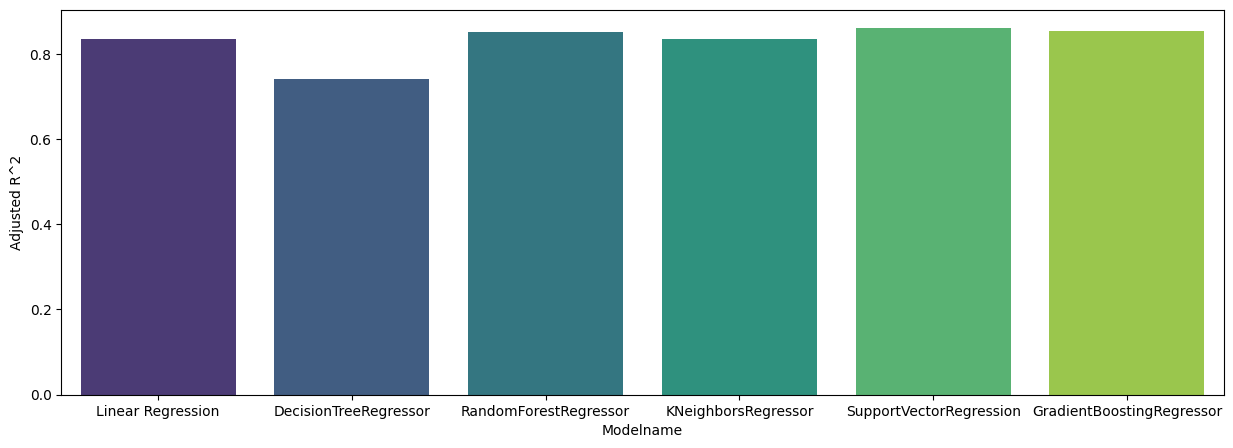

In [276]:
plt.figure(figsize=(15,5))
sns.barplot(x='Modelname',y='Adjusted R^2',data=df_model,palette='viridis')

# Random Forest Model,SVM performence and GradientBoostingRegressor is High in accuracy
## R2-------85 to 86

# Hyper Parameter Tunning

In [255]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
# Initialize the RandomForestRegressor
rf = RandomForestRegressor() # Create an instance of RandomForestRegressor
parameters = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid_search = GridSearchCV(estimator=rf, param_grid=parameters, cv=3,scoring='r2')
grid_search.fit(x_train, y_train)

print("Best Hyperparameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)


Best Hyperparameters:  {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best Score:  0.864985918135043


In [256]:
# model
y_pred = grid_search.best_estimator_.predict(x_test)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(r2)
print(mae)

0.854743116390431
0.16747319067242267


In [257]:
from sklearn.svm import SVR
svr = SVR()
parameters = {
    'C': [0.1, 1],
    'kernel':['linear', 'rbf', 'poly'],
    'degree': [2, 3],
    'gamma': ['scale', 'auto'],
    'coef0': [0, 0.1, 0.5]
}

# Perform Grid Search
grid_search = GridSearchCV(estimator=svr, param_grid=parameters, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(x_train, y_train)

print("Best Hyperparameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)

# Model
y_pred = grid_search.best_estimator_.predict(x_test)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(r2)
print(mae)



Fitting 3 folds for each of 72 candidates, totalling 216 fits
Best Hyperparameters:  {'C': 1, 'coef0': 0, 'degree': 2, 'gamma': 'scale', 'kernel': 'rbf'}
Best Score:  0.867861345329011
0.8604360901017765
0.1647321591855631


In [262]:
# hyper tuning for gradientboosting
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_absolute_error

param_grid = {
   'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'subsample': [0.7, 0.8, 1.0]
}
# perform grid search
grid_search = GridSearchCV(estimator=GradientBoostingRegressor(), param_grid=param_grid, cv=3, scoring='r2')
grid_search.fit(x_train, y_train)

print("Best Hyperparameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)

# Model
y_pred = grid_search.best_estimator_.predict(x_test)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(r2)
print(mae)

Best Hyperparameters:  {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.8}
Best Score:  0.8824218613651388
0.8718535059376386
0.16576493766245176


# model scores after hyper parameter tuning

In [277]:
model_score_HPT=[["SupportVectorRegression",0.8604360901017765,0.1647321591855631],["GradientBoostingRegressor",0.8718535059376386,0.16576493766245176],["RandomForestRegressor",0.854743116390431,0.16747319067242267]]
df_model_HPT = pd.DataFrame(model_score_HPT, columns=['Modelname',"Adjusted R^2","MAE"])
df_model_HPT

,Modelname,Adjusted R^2,MAE
0,SupportVectorRegression,0.860436,0.164732
1,GradientBoostingRegressor,0.871854,0.165765
2,RandomForestRegressor,0.854743,0.167473


<Axes: xlabel='Modelname', ylabel='Adjusted R^2'>

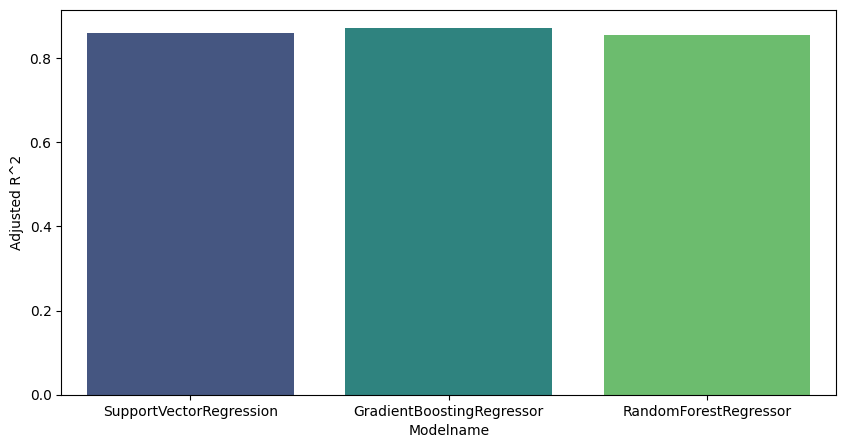

In [278]:
plt.figure(figsize=(10,5))
sns.barplot(x='Modelname',y='Adjusted R^2',data=df_model_HPT,palette='viridis')


# Real-time Predictions:
## Using the pipeline the process will be automated.

In [263]:
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import joblib

# Load dataset
X = df_laptop.drop('Price', axis=1)
y = np.log(df_laptop['Price'])

# Preprocessing
numerical_features = ['Ram', 'PPI', 'SSD']
categorical_features1 = ['Company', 'TypeName', 'Cpu_Brand',  'Gpu_Brand', 'Op_Sys']
categorical_features2 = ['Clock_Speed_Category', 'Weight_Category']
numerical_transformer = StandardScaler()
categorical_transformer1 = OneHotEncoder(handle_unknown='ignore')
categorical_transformer2 = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=np.nan)

# ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat1', categorical_transformer1, categorical_features1),
        ('cat2', categorical_transformer2, categorical_features2)
    ]
)

# Model pipeline
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', GradientBoostingRegressor(learning_rate=0.1, max_depth=3, n_estimators=300, subsample=0.8, random_state=42))
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model_pipeline.fit(X_train, y_train)

# Save the model
joblib.dump(model_pipeline, 'laptop_price_model.pkl')
print("Model saved successfully!")



Model saved successfully!


In [264]:
# Load the model and predict
loaded_model = joblib.load('laptop_price_model.pkl')
new_laptop = pd.DataFrame([{
    'Company': 'HP',
    'TypeName': 'Notebook',
    'Ram': 16,
    'PPI': 141.2,
    'Cpu_Brand': 'Intel Core i5',
    'Clock_Speed_Category': 'Medium',
    'SSD': 512,
    'Gpu_Brand':'Intel Iris Xe Graphics',
    'Op_Sys': 'Windows',
    'Weight_Category': 'UltraLightweight'
}])
predicted_price = loaded_model.predict(new_laptop)
print(f"Predicted Price: {np.exp(predicted_price[0])}")

Predicted Price: 83969.79728279538


In [266]:
# r2
Actual_price=np.log(82929)
Actual_price = [Actual_price]
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(Actual_price, predicted_price)
print(f"Mean Absolute Error (MAE): {mae:.2f}")


Mean Absolute Error (MAE): 0.01


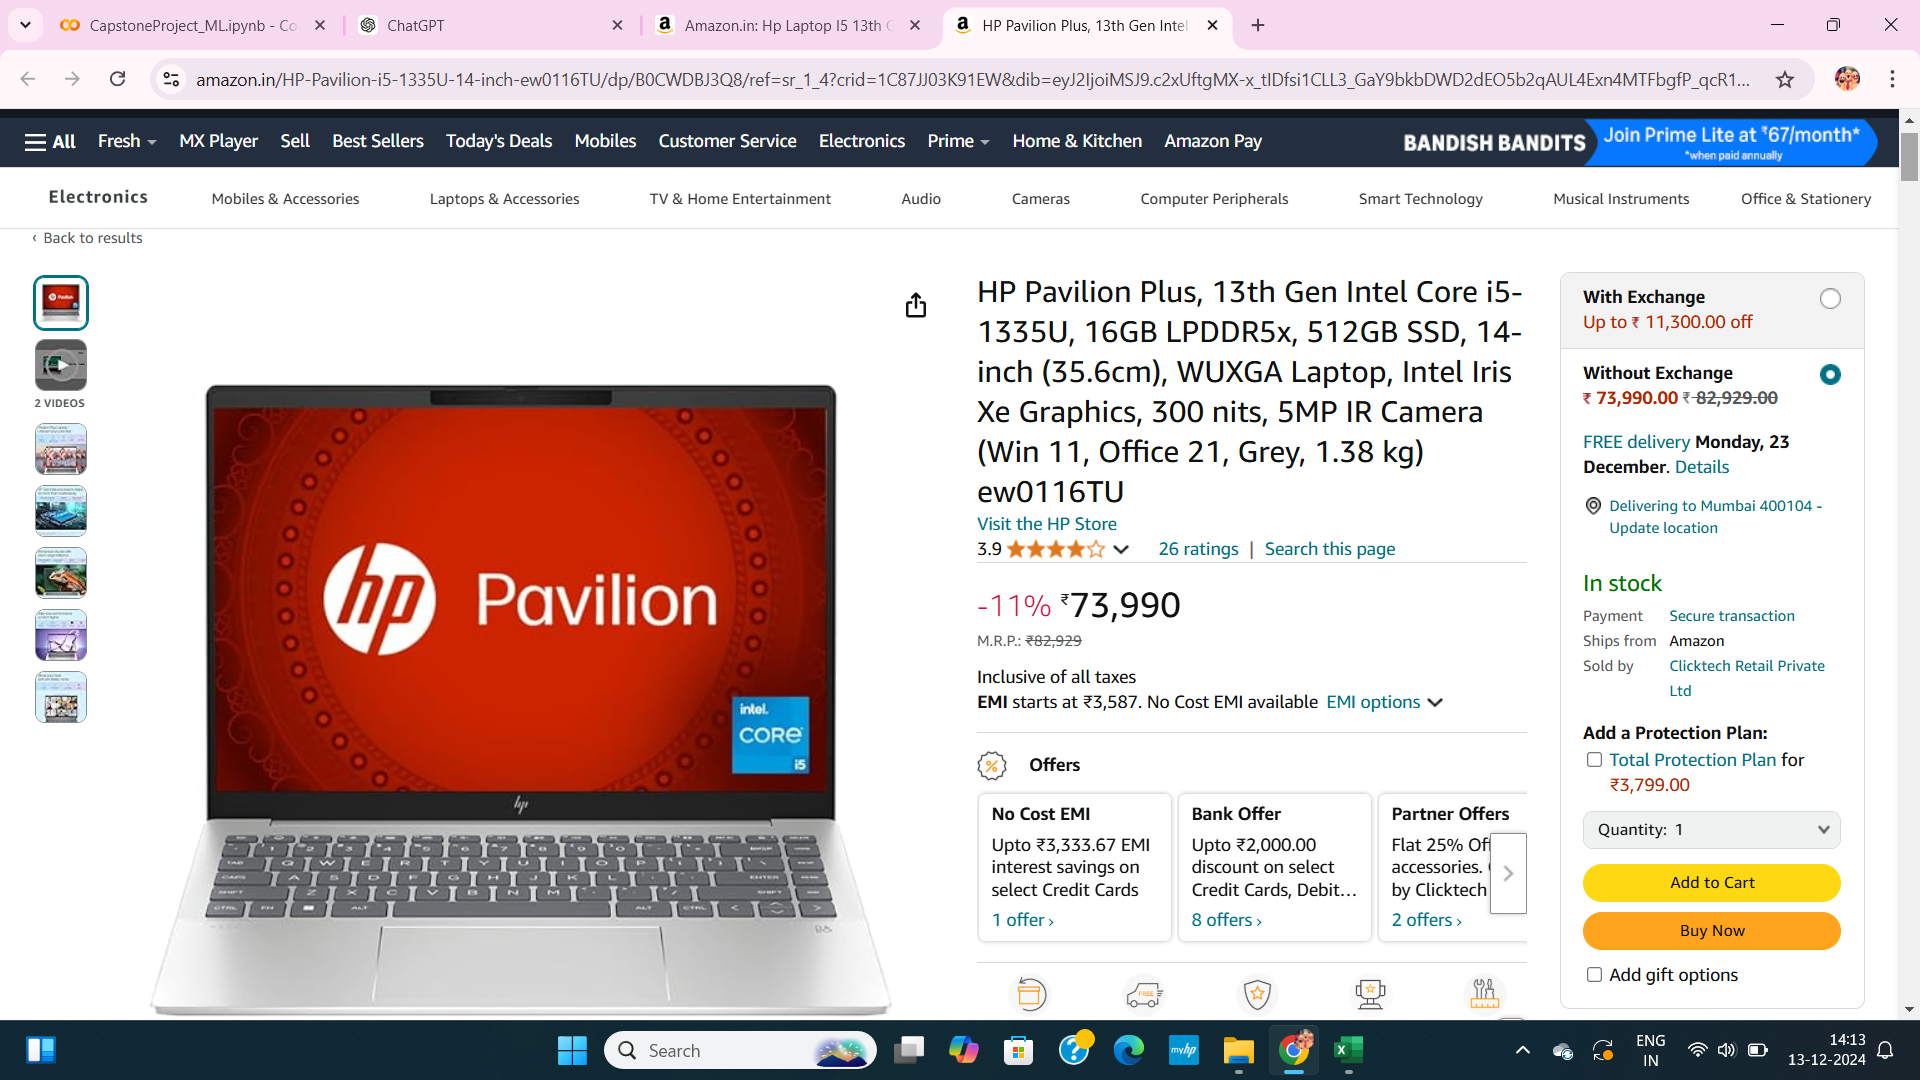

# Questions to Explore:

## 1. Which features have the most significant impact on laptop prices?
### 1. Company: Premium brands often have higher prices due to reputation and build quality.
### 2. TypeName: Type of laptop (e.g., Ultrabook, Gaming, Notebook) affects pricing. Gaming laptops tend to be more expensive due to powerful GPUs and advanced cooling systems.
### 3. Ram: Higher RAM generally increases price, especially configurations of 16 GB or more.
### 4. PPI (Pixels Per Inch): Higher PPI (better display quality) correlates with higher prices, especially for 4K or high-refresh-rate screens.
### 5. Cpu_Brand: CPUs from high-end series (e.g., Intel i7/i9, AMD Ryzen 7/9) command higher prices.
### 6. SSD: Larger SSD capacities or faster types (e.g., NVMe SSDs) increase costs compared to traditional HDDs.
### 7. Gpu_Brand: Dedicated GPUs (e.g., NVIDIA or AMD) make laptops more expensive than those with integrated graphics.

## 2. Can the model accurately predict the prices of laptops from lesser-known brands?
### Predicting laptop prices for lesser-known brands can be challenging for an ML model. Lack of Training Data-Lesser-known brands may have fewer data points in the dataset, leading to underrepresentation during training.


## 3. Does the brand of the laptop significantly influence its price?
### Yes, the brand of the laptop significnatly influence its price.

## 4. How well does the model perform on laptops with high-end specifications compared to budget laptops?
### The model may not perform good on laptops with high-end specifications compared to budget laptops.
### High-end laptops often have price outliers due to luxury branding or special editions, which can skew predictions.
### The model might struggle with accurate predictions if these nonlinear patterns aren't well-represented in the data or if advanced features are rare.


## 5. What are the limitations and challenges in predicting laptop prices accurately?
### 1. Data Quality and Availability: Missing, incomplete, or outdated data can affect model accuracy.
### 2. Imbalanced Dataset: Budget laptops may dominate the dataset, leading to underrepresentation of high-end or niche models.

## 6. How does the model perform when predicting the prices of newly released laptops not present in the training dataset?
### Predicting the prices of newly released laptops not present in the training dataset is challenging because the model has no prior exposure to these configurations, features, or pricing strategies.
